TITANIC SURVIVAL PREDICTION - MACHINE LEARNING CLASSIFICATION
✓ Folder dataset ditemukan: D:\coursera-assigment\titanic_dataset\
✓ Folder output ditemukan: D:\coursera-assigment\Course 3 - SL Klasifikasi\result\

[1] DATA LOADED SUCCESSFULLY
Training data shape: (891, 23)
Test data shape: (418, 22)

[2] FEATURE SELECTION & PREPARATION

✓ Features selected: 13
✓ Feature names: ['Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Encoded', 'FamilySize', 'IsAlone', 'HasCabin', 'Title_Encoded', 'AgeGroup_Encoded', 'FareGroup_Encoded']

✓ X shape: (891, 13)
✓ y shape: (891,)
✓ Target distribution: {0: 549, 1: 342}

[3] TRAIN-TEST SPLIT
✓ Training set: 712 samples (79.9%)
✓ Test set: 179 samples (20.1%)
✓ Stratified split ensures balanced target distribution

[4] FEATURE SCALING
✓ StandardScaler applied to normalize features
✓ Prevents features with larger scales from dominating the model

[5] TRAINING MULTIPLE CLASSIFICATION MODELS

[MODEL 1] Logistic Regression (Baseline - 

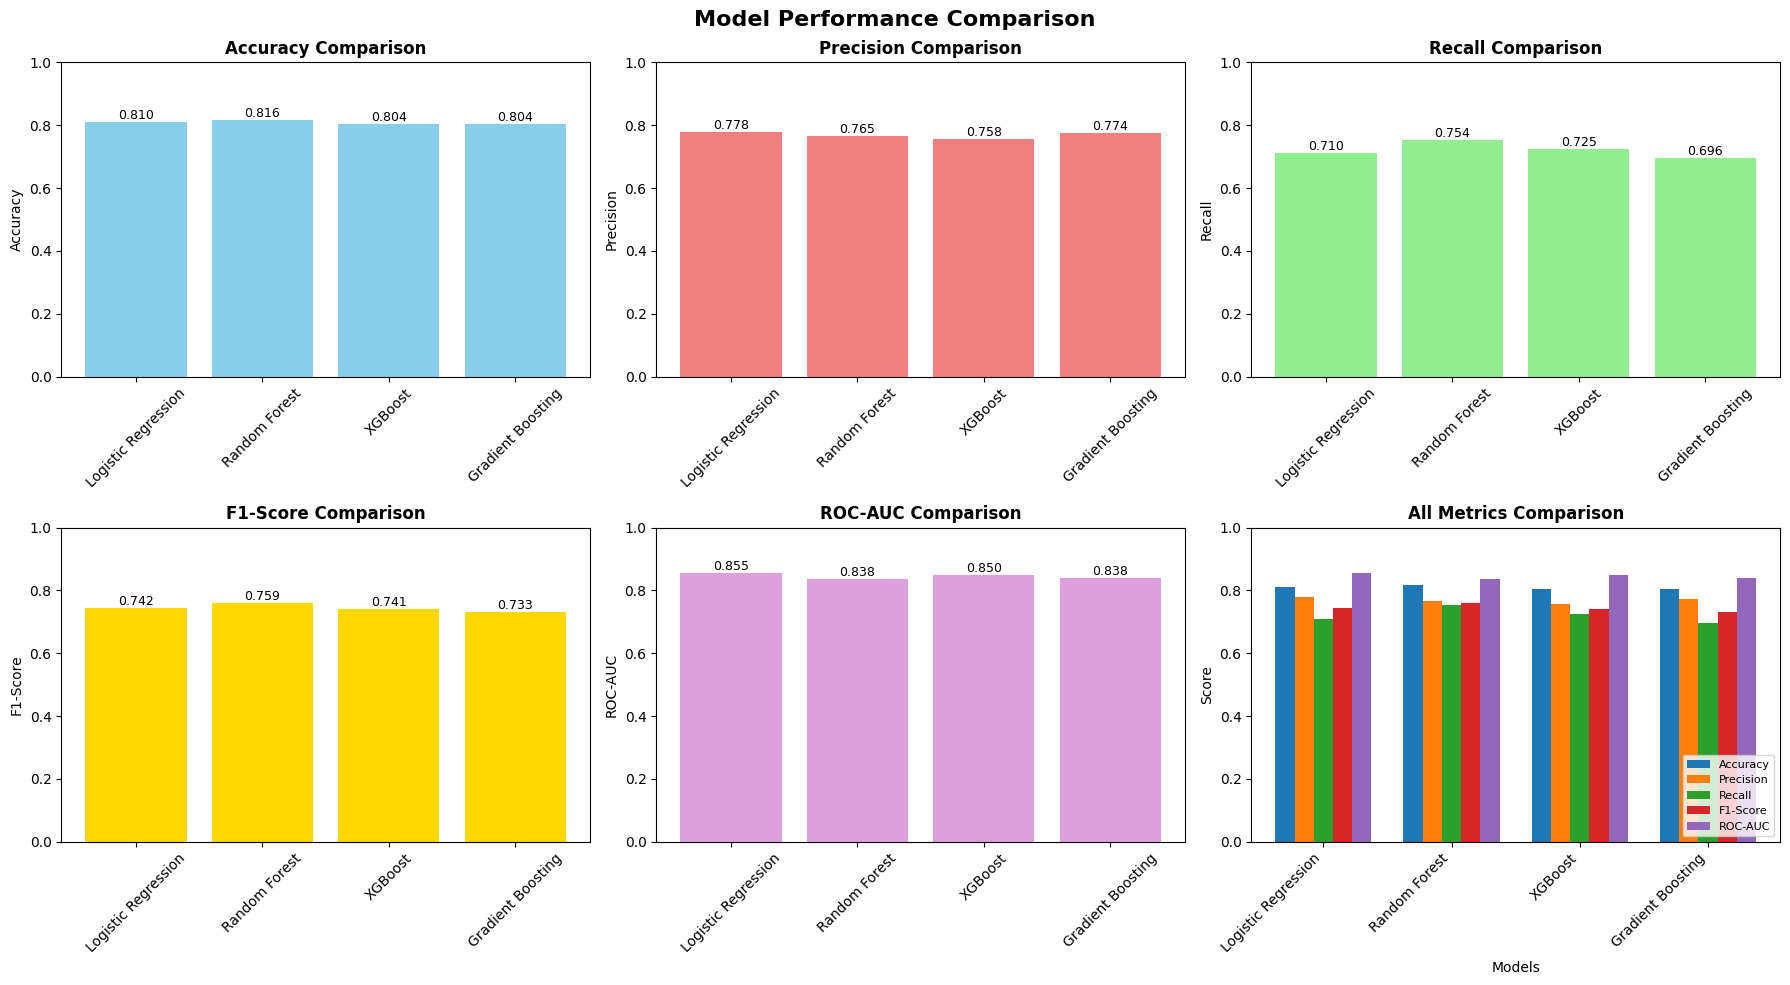

✓ Visualization 1: Model Comparison - SAVED


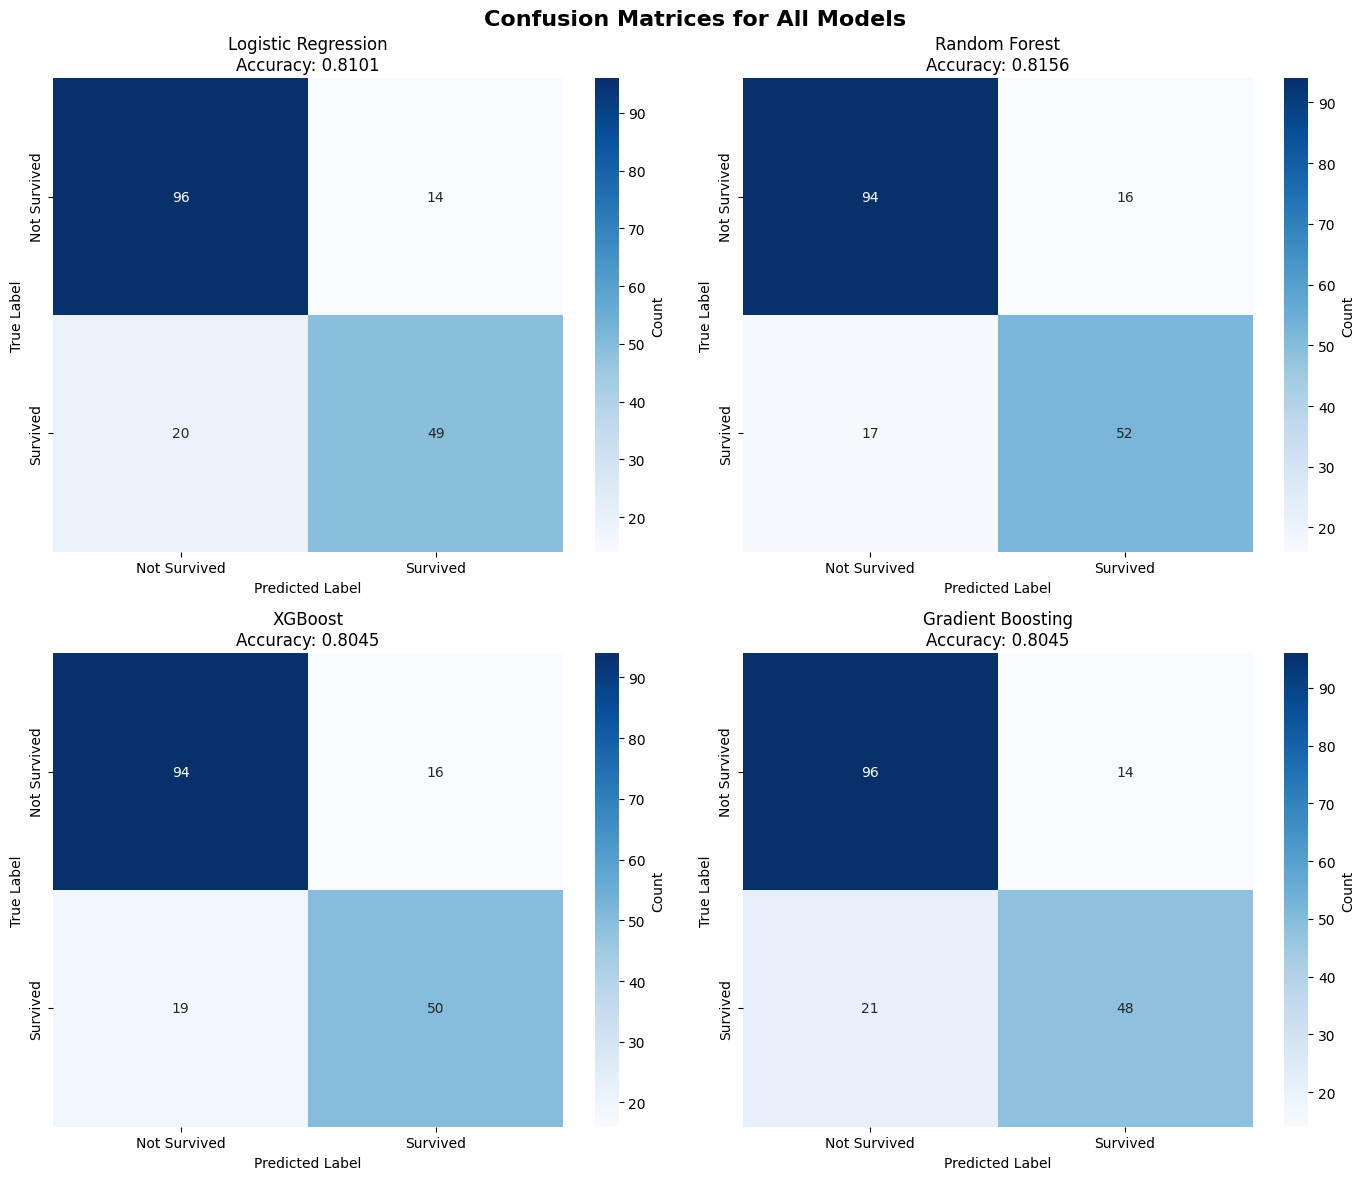

✓ Visualization 2: Confusion Matrices - SAVED


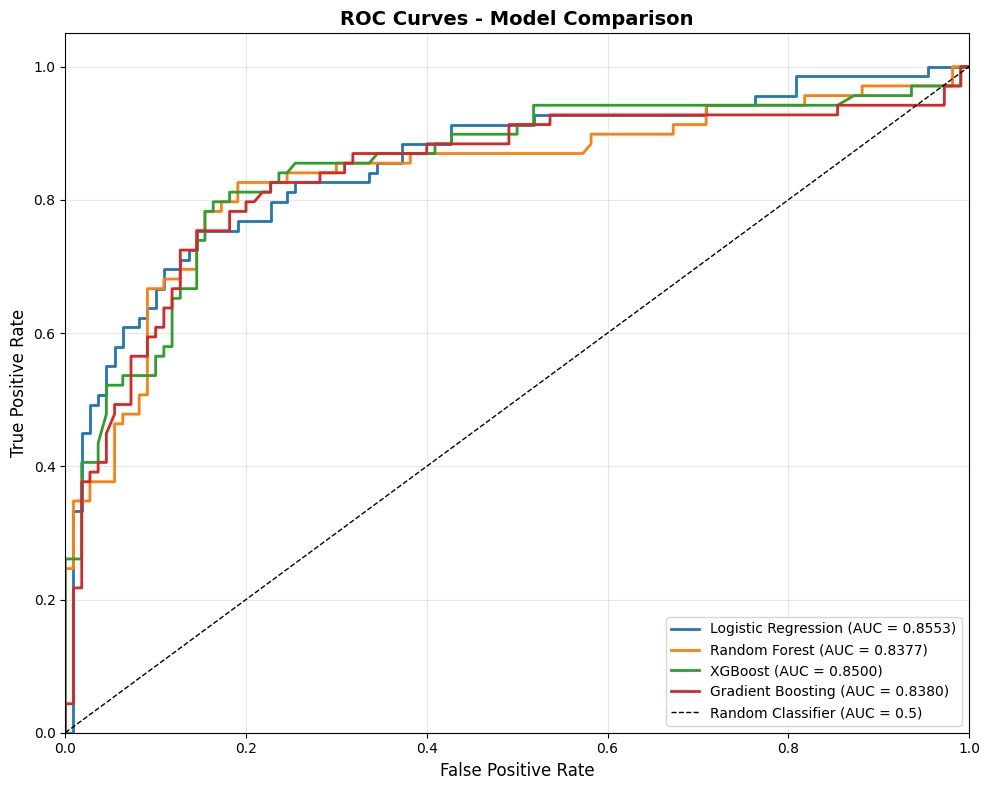

✓ Visualization 3: ROC Curves - SAVED


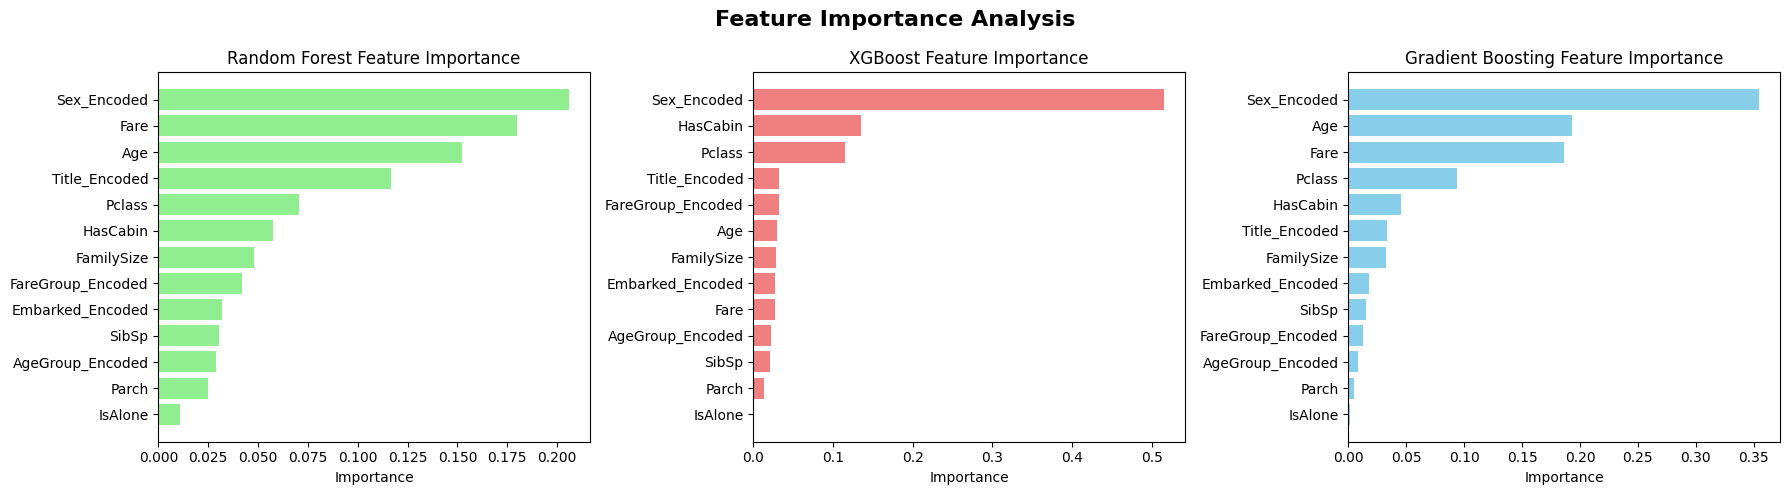

✓ Visualization 4: Feature Importance - SAVED

[8] DETAILED CLASSIFICATION REPORTS

Logistic Regression:
----------------------------------------------------------------------
              precision    recall  f1-score   support

Not Survived       0.83      0.87      0.85       110
    Survived       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Random Forest:
----------------------------------------------------------------------
              precision    recall  f1-score   support

Not Survived       0.85      0.85      0.85       110
    Survived       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179


XGBoost:
----------------------------------------------------------------------
  

In [1]:
# ==========================================
# TITANIC CLASSIFICATION - MACHINE LEARNING
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
warnings.filterwarnings('ignore')

print("="*70)
print("TITANIC SURVIVAL PREDICTION - MACHINE LEARNING CLASSIFICATION")
print("="*70)

# ==========================================
# 1. LOAD DATA
# ==========================================

# Path ke dataset dan output
data_path = 'D:\\coursera-assigment\\titanic_dataset\\'
output_path = 'D:\\coursera-assigment\\Course 3 - SL Klasifikasi\\result\\'

# Verifikasi folder data
if not os.path.exists(data_path):
    print(f"⚠️ Warning: Folder '{data_path}' tidak ditemukan!")
else:
    print(f"✓ Folder dataset ditemukan: {data_path}")

# Verifikasi dan buat folder output
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print(f"✓ Folder output dibuat: {output_path}")
else:
    print(f"✓ Folder output ditemukan: {output_path}")

# Load cleaned data dari proyek EDA sebelumnya
train_df = pd.read_csv(data_path + 'train_cleaned.csv')
test_df = pd.read_csv(data_path + 'test_cleaned.csv')

print("\n[1] DATA LOADED SUCCESSFULLY")
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

# ==========================================
# 2. PREPARE FEATURES & TARGET
# ==========================================

print("\n" + "="*70)
print("[2] FEATURE SELECTION & PREPARATION")
print("="*70)

# Pilih fitur untuk modeling
feature_cols = ['Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare',
                'Embarked_Encoded', 'FamilySize', 'IsAlone', 'HasCabin',
                'Title_Encoded', 'AgeGroup_Encoded', 'FareGroup_Encoded']

X = train_df[feature_cols]
y = train_df['Survived']

print(f"\n✓ Features selected: {len(feature_cols)}")
print(f"✓ Feature names: {feature_cols}")
print(f"\n✓ X shape: {X.shape}")
print(f"✓ y shape: {y.shape}")
print(f"✓ Target distribution: {y.value_counts().to_dict()}")

# ==========================================
# 3. TRAIN-TEST SPLIT
# ==========================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "="*70)
print("[3] TRAIN-TEST SPLIT")
print("="*70)
print(f"✓ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Stratified split ensures balanced target distribution")

# ==========================================
# 4. FEATURE SCALING
# ==========================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*70)
print("[4] FEATURE SCALING")
print("="*70)
print("✓ StandardScaler applied to normalize features")
print("✓ Prevents features with larger scales from dominating the model")

# ==========================================
# 5. MODEL TRAINING
# ==========================================

print("\n" + "="*70)
print("[5] TRAINING MULTIPLE CLASSIFICATION MODELS")
print("="*70)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# Dictionary to store models and results
models = {}
results = {}

# ==========================================
# MODEL 1: LOGISTIC REGRESSION (Baseline)
# ==========================================

print("\n[MODEL 1] Logistic Regression (Baseline - Interpretable)")
print("-" * 70)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

models['Logistic Regression'] = lr_model

results['Logistic Regression'] = {
    'predictions': lr_pred,
    'probabilities': lr_pred_proba,
    'accuracy': accuracy_score(y_test, lr_pred),
    'precision': precision_score(y_test, lr_pred),
    'recall': recall_score(y_test, lr_pred),
    'f1': f1_score(y_test, lr_pred),
    'roc_auc': roc_auc_score(y_test, lr_pred_proba)
}

print(f"✓ Accuracy:  {results['Logistic Regression']['accuracy']:.4f}")
print(f"✓ Precision: {results['Logistic Regression']['precision']:.4f}")
print(f"✓ Recall:    {results['Logistic Regression']['recall']:.4f}")
print(f"✓ F1-Score:  {results['Logistic Regression']['f1']:.4f}")
print(f"✓ ROC-AUC:   {results['Logistic Regression']['roc_auc']:.4f}")

# ==========================================
# MODEL 2: RANDOM FOREST (Medium Complexity)
# ==========================================

print("\n[MODEL 2] Random Forest (Balanced - Interpretable & Accurate)")
print("-" * 70)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)  # RF doesn't require scaling

rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

models['Random Forest'] = rf_model

results['Random Forest'] = {
    'predictions': rf_pred,
    'probabilities': rf_pred_proba,
    'accuracy': accuracy_score(y_test, rf_pred),
    'precision': precision_score(y_test, rf_pred),
    'recall': recall_score(y_test, rf_pred),
    'f1': f1_score(y_test, rf_pred),
    'roc_auc': roc_auc_score(y_test, rf_pred_proba)
}

print(f"✓ Accuracy:  {results['Random Forest']['accuracy']:.4f}")
print(f"✓ Precision: {results['Random Forest']['precision']:.4f}")
print(f"✓ Recall:    {results['Random Forest']['recall']:.4f}")
print(f"✓ F1-Score:  {results['Random Forest']['f1']:.4f}")
print(f"✓ ROC-AUC:   {results['Random Forest']['roc_auc']:.4f}")

# ==========================================
# MODEL 3: XGBOOST (High Performance)
# ==========================================

print("\n[MODEL 3] XGBoost (High Performance - Ensemble)")
print("-" * 70)

xgb_model = XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.1,
                          max_depth=5, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

models['XGBoost'] = xgb_model

results['XGBoost'] = {
    'predictions': xgb_pred,
    'probabilities': xgb_pred_proba,
    'accuracy': accuracy_score(y_test, xgb_pred),
    'precision': precision_score(y_test, xgb_pred),
    'recall': recall_score(y_test, xgb_pred),
    'f1': f1_score(y_test, xgb_pred),
    'roc_auc': roc_auc_score(y_test, xgb_pred_proba)
}

print(f"✓ Accuracy:  {results['XGBoost']['accuracy']:.4f}")
print(f"✓ Precision: {results['XGBoost']['precision']:.4f}")
print(f"✓ Recall:    {results['XGBoost']['recall']:.4f}")
print(f"✓ F1-Score:  {results['XGBoost']['f1']:.4f}")
print(f"✓ ROC-AUC:   {results['XGBoost']['roc_auc']:.4f}")

# ==========================================
# MODEL 4: GRADIENT BOOSTING (Bonus)
# ==========================================

print("\n[MODEL 4] Gradient Boosting (Bonus - Alternative Ensemble)")
print("-" * 70)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42,
                                      learning_rate=0.1, max_depth=5)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

models['Gradient Boosting'] = gb_model

results['Gradient Boosting'] = {
    'predictions': gb_pred,
    'probabilities': gb_pred_proba,
    'accuracy': accuracy_score(y_test, gb_pred),
    'precision': precision_score(y_test, gb_pred),
    'recall': recall_score(y_test, gb_pred),
    'f1': f1_score(y_test, gb_pred),
    'roc_auc': roc_auc_score(y_test, gb_pred_proba)
}

print(f"✓ Accuracy:  {results['Gradient Boosting']['accuracy']:.4f}")
print(f"✓ Precision: {results['Gradient Boosting']['precision']:.4f}")
print(f"✓ Recall:    {results['Gradient Boosting']['recall']:.4f}")
print(f"✓ F1-Score:  {results['Gradient Boosting']['f1']:.4f}")
print(f"✓ ROC-AUC:   {results['Gradient Boosting']['roc_auc']:.4f}")

# ==========================================
# 6. MODEL COMPARISON
# ==========================================

print("\n" + "="*70)
print("[6] MODEL PERFORMANCE COMPARISON")
print("="*70)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
})

comparison_df = comparison_df.round(4)
print("\n" + comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
print(f"\n✓ BEST MODEL (by Accuracy): {best_model_name}")
print(f"  Accuracy: {comparison_df[comparison_df['Model'] == best_model_name]['Accuracy'].values[0]:.4f}")

# ==========================================
# 7. VISUALIZATIONS
# ==========================================

print("\n" + "="*70)
print("[7] GENERATING VISUALIZATIONS")
print("="*70)

# Visualization 1: Model Comparison Bar Chart
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=colors[idx])
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Overall comparison
ax = axes[1, 2]
x = np.arange(len(comparison_df))
width = 0.15

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, comparison_df[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('All Metrics Comparison', fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend(loc='lower right', fontsize=8)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.savefig(output_path + '01_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 1: Model Comparison - SAVED")

# Visualization 2: Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold')

for idx, (model_name, ax) in enumerate(zip(results.keys(), axes.flatten())):
    cm = confusion_matrix(y_test, results[model_name]['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar_kws={'label': 'Count'})
    ax.set_title(f'{model_name}\nAccuracy: {results[model_name]["accuracy"]:.4f}')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    ax.set_xticklabels(['Not Survived', 'Survived'])
    ax.set_yticklabels(['Not Survived', 'Survived'])

plt.tight_layout()
plt.savefig(output_path + '02_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 2: Confusion Matrices - SAVED")

# Visualization 3: ROC Curves
plt.figure(figsize=(10, 8))

for model_name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[model_name]['probabilities'])
    auc = results[model_name]['roc_auc']
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(output_path + '03_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 3: ROC Curves - SAVED")

# Visualization 4: Feature Importance (for tree-based models)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')

# Random Forest
rf_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': models['Random Forest'].feature_importances_
}).sort_values('Importance', ascending=True)

axes[0].barh(rf_importance['Feature'], rf_importance['Importance'], color='lightgreen')
axes[0].set_title('Random Forest Feature Importance')
axes[0].set_xlabel('Importance')

# XGBoost
xgb_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': models['XGBoost'].feature_importances_
}).sort_values('Importance', ascending=True)

axes[1].barh(xgb_importance['Feature'], xgb_importance['Importance'], color='lightcoral')
axes[1].set_title('XGBoost Feature Importance')
axes[1].set_xlabel('Importance')

# Gradient Boosting
gb_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': models['Gradient Boosting'].feature_importances_
}).sort_values('Importance', ascending=True)

axes[2].barh(gb_importance['Feature'], gb_importance['Importance'], color='skyblue')
axes[2].set_title('Gradient Boosting Feature Importance')
axes[2].set_xlabel('Importance')

plt.tight_layout()
plt.savefig(output_path + '04_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 4: Feature Importance - SAVED")

# ==========================================
# 8. DETAILED CLASSIFICATION REPORTS
# ==========================================

print("\n" + "="*70)
print("[8] DETAILED CLASSIFICATION REPORTS")
print("="*70)

for model_name in results.keys():
    print(f"\n{model_name}:")
    print("-" * 70)
    print(classification_report(y_test, results[model_name]['predictions'],
                                target_names=['Not Survived', 'Survived']))

# ==========================================
# 9. SAVE RESULTS
# ==========================================

print("\n" + "="*70)
print("[9] SAVING RESULTS")
print("="*70)

# Save comparison results
comparison_df.to_csv(output_path + 'model_comparison_results.csv', index=False)
print("✓ Model comparison results saved")

# Save best model
best_model = models[best_model_name]
with open(output_path + f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"✓ Best model ({best_model_name}) saved")

print("\n" + "="*70)
print("MACHINE LEARNING PIPELINE COMPLETED SUCCESSFULLY!")
print("="*70)
print(f"\n✓ Best Performing Model: {best_model_name}")
print(f"✓ Best Model Accuracy: {comparison_df[comparison_df['Model'] == best_model_name]['Accuracy'].values[0]:.4f}")
print(f"\n✓ Output folder: {output_path}")
print(f"\n✓ Files saved:")
print(f"  - 01_model_comparison.png")
print(f"  - 02_confusion_matrices.png")
print(f"  - 03_roc_curves.png")
print(f"  - 04_feature_importance.png")
print(f"  - model_comparison_results.csv")
print(f"  - best_model_{best_model_name.replace(' ', '_').lower()}.pkl")
print("="*70)

VISUALISASI EKSPLORASI DATA - UNTUK LAPORAN ML

[1] Creating Dataset Overview Visualization...


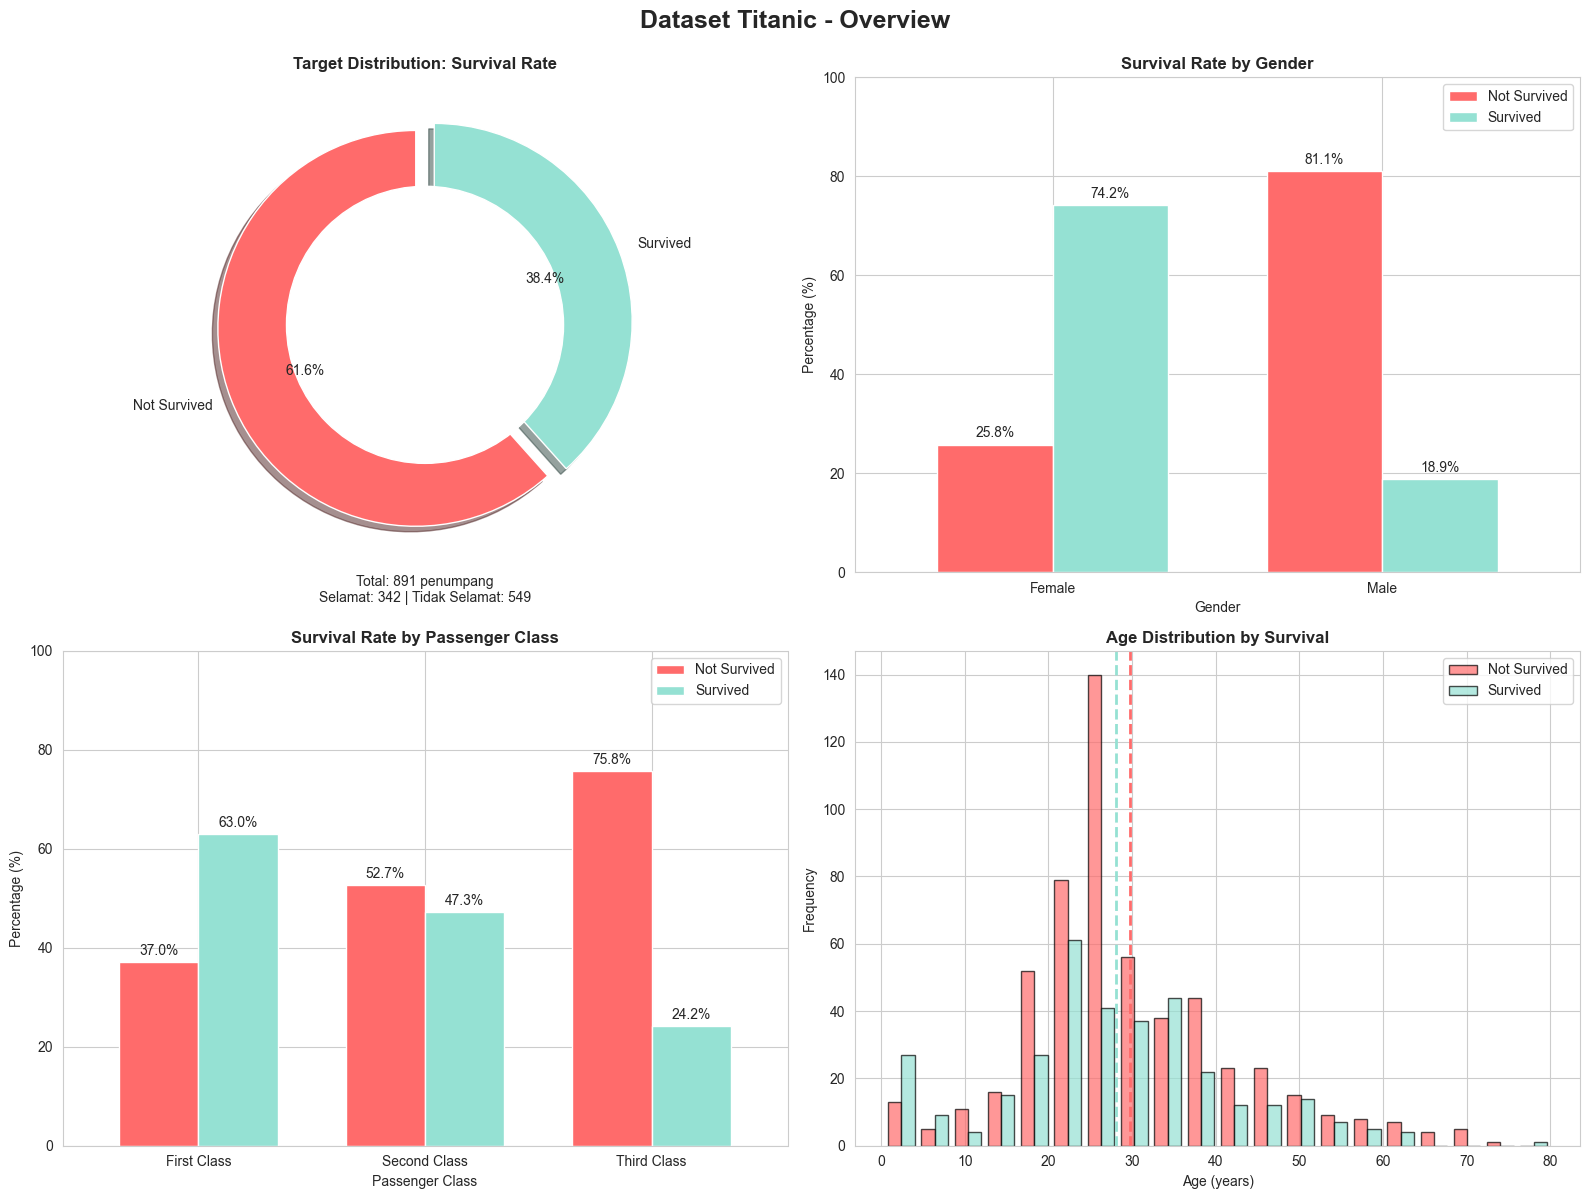

✓ Visualization 1: Dataset Overview - SAVED

[2] Creating Detailed EDA Visualization...


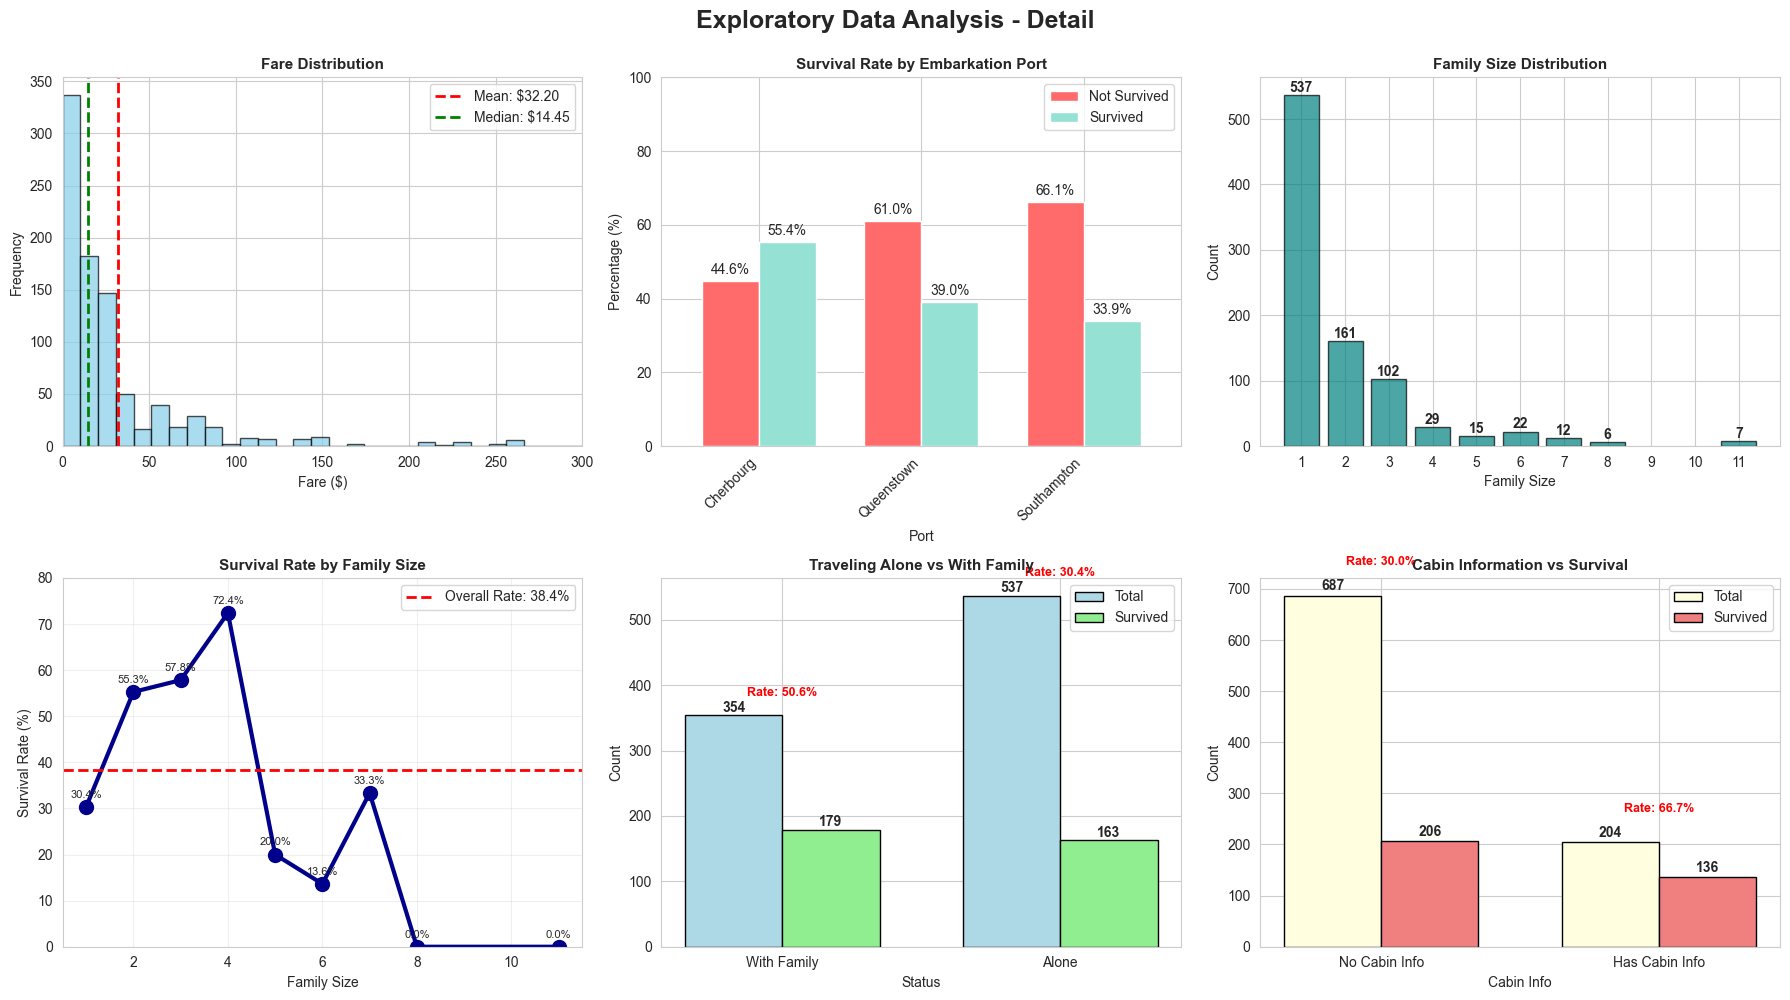

✓ Visualization 2: Detailed EDA - SAVED

[3] Creating Correlation Heatmap...


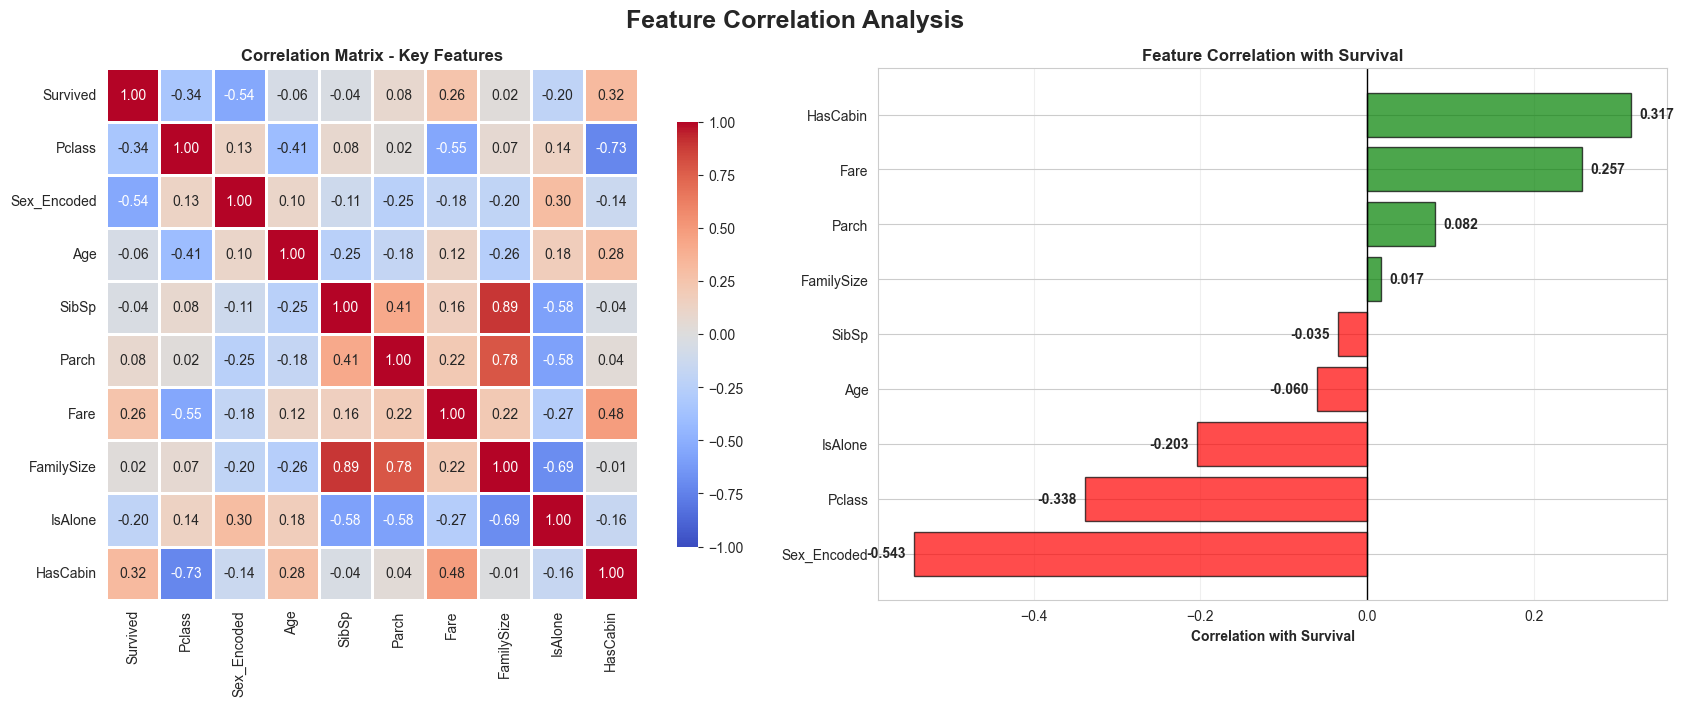

✓ Visualization 3: Correlation Heatmap - SAVED

[4] Creating Advanced Insights Visualization...


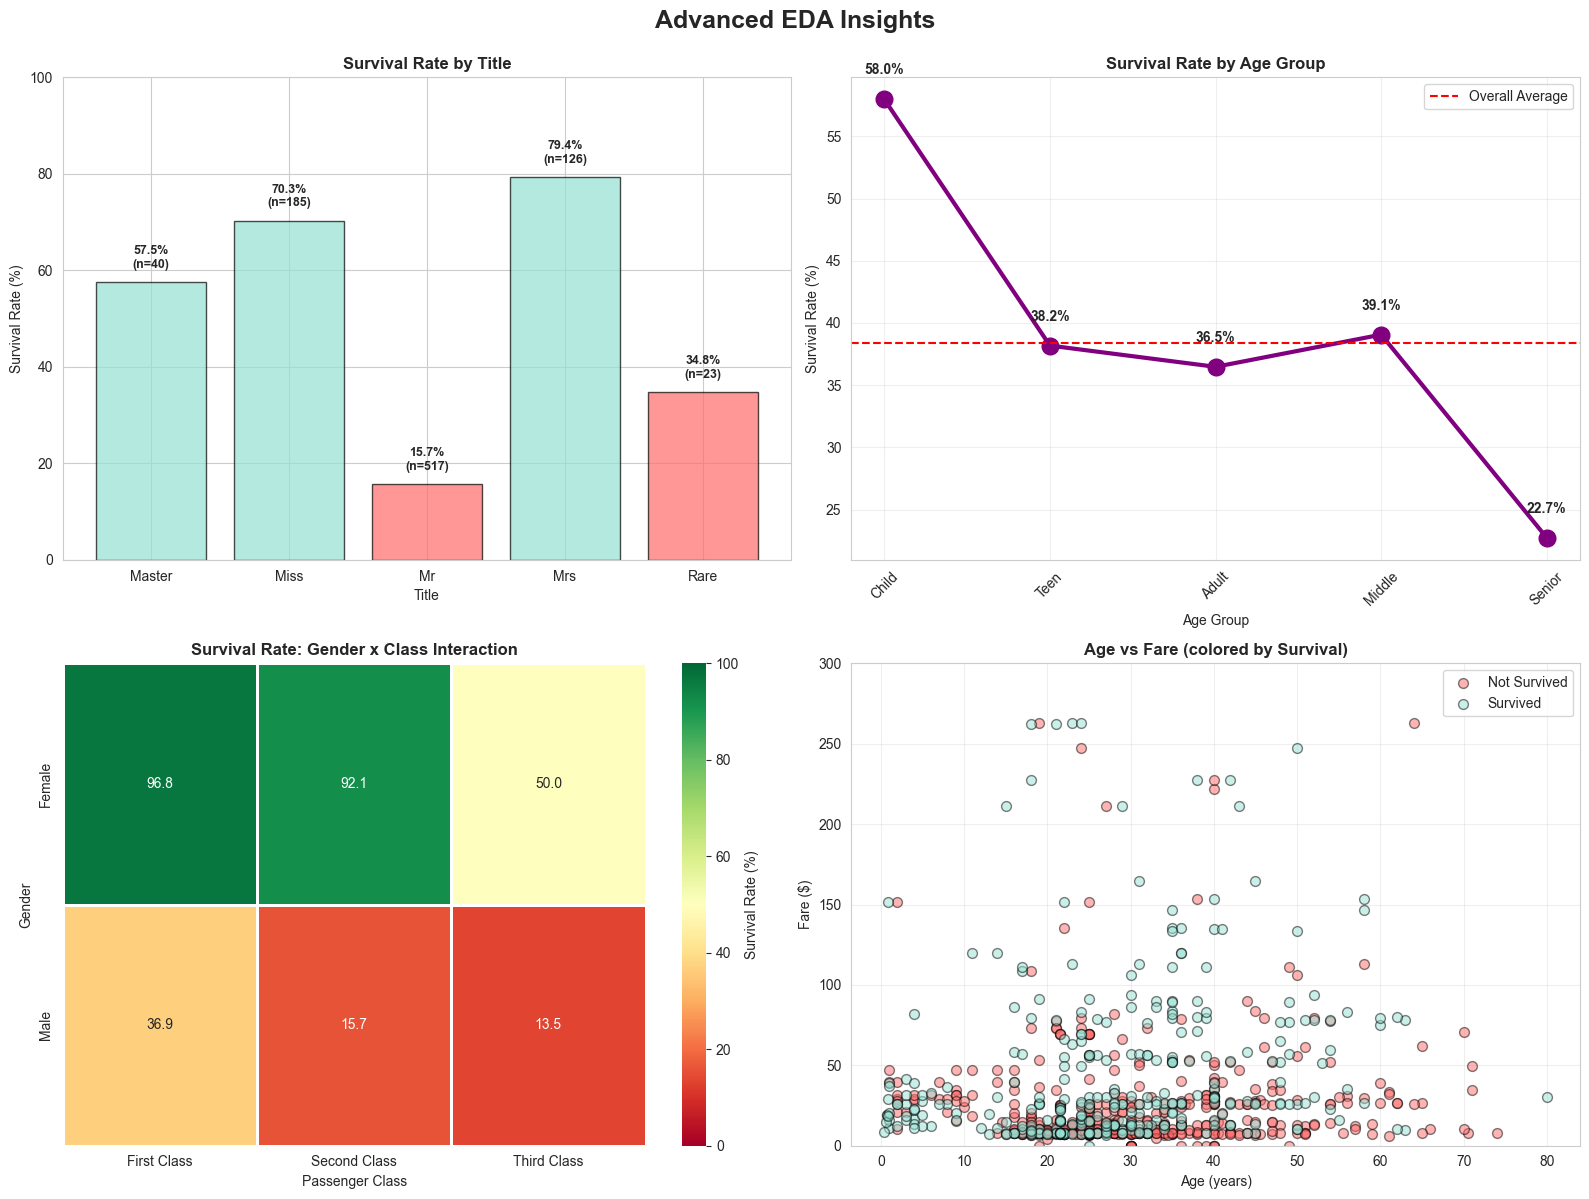

✓ Visualization 4: Advanced Insights - SAVED

VISUALISASI EDA SELESAI!

✓ File yang tersimpan:
  1. 05_eda_overview.png - Overview dataset & distribusi target
  2. 06_eda_detailed.png - Analisis detail fitur
  3. 07_eda_correlation.png - Correlation matrix & survival correlation
  4. 08_eda_advanced.png - Advanced insights (Title, AgeGroup, Interaction)

✓ Total: 4 visualisasi untuk laporan


In [3]:
# ==========================================
# VISUALISASI EKSPLORASI DATA UNTUK LAPORAN
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

print("="*70)
print("VISUALISASI EKSPLORASI DATA - UNTUK LAPORAN ML")
print("="*70)

# Path setup (sama dengan cell sebelumnya)
data_path = 'D:\\coursera-assigment\\titanic_dataset\\'
output_path = 'D:\\coursera-assigment\\Course 3 - SL Klasifikasi\\result\\'

# Load data
train_df = pd.read_csv(data_path + 'train_cleaned.csv')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ==========================================
# VISUALIZATION 1: OVERVIEW DATASET
# ==========================================

print("\n[1] Creating Dataset Overview Visualization...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Dataset Titanic - Overview', fontsize=18, fontweight='bold', y=0.995)

# 1.1 Target Distribution
survival_counts = train_df['Survived'].value_counts()
colors_survival = ['#FF6B6B', '#95E1D3']
axes[0, 0].pie(survival_counts.values, labels=['Not Survived', 'Survived'],
               autopct='%1.1f%%', colors=colors_survival, startangle=90,
               explode=(0.05, 0.05), shadow=True)
axes[0, 0].set_title('Target Distribution: Survival Rate', fontweight='bold', fontsize=12)
center_circle = plt.Circle((0,0), 0.70, fc='white')
axes[0, 0].add_artist(center_circle)

# Add count
total = len(train_df)
survived = survival_counts[1]
not_survived = survival_counts[0]
axes[0, 0].text(0, -1.4, f'Total: {total} penumpang\nSelamat: {survived} | Tidak Selamat: {not_survived}',
               ha='center', fontsize=10)

# 1.2 Gender Distribution by Survival
gender_survival = pd.crosstab(train_df['Sex'], train_df['Survived'], normalize='index') * 100
gender_survival.plot(kind='bar', ax=axes[0, 1], color=['#FF6B6B', '#95E1D3'], width=0.7)
axes[0, 1].set_title('Survival Rate by Gender', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[0, 1].legend(['Not Survived', 'Survived'], loc='upper right')
axes[0, 1].set_ylim([0, 100])

# Add value labels
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.1f%%', padding=3)

# 1.3 Passenger Class Distribution by Survival
pclass_survival = pd.crosstab(train_df['Pclass'], train_df['Survived'], normalize='index') * 100
pclass_survival.plot(kind='bar', ax=axes[1, 0], color=['#FF6B6B', '#95E1D3'], width=0.7)
axes[1, 0].set_title('Survival Rate by Passenger Class', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_xticklabels(['First Class', 'Second Class', 'Third Class'], rotation=0)
axes[1, 0].legend(['Not Survived', 'Survived'], loc='upper right')
axes[1, 0].set_ylim([0, 100])

# Add value labels
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.1f%%', padding=3)

# 1.4 Age Distribution by Survival
ages_not_survived = train_df[train_df['Survived'] == 0]['Age'].dropna()
ages_survived = train_df[train_df['Survived'] == 1]['Age'].dropna()

axes[1, 1].hist([ages_not_survived, ages_survived], bins=20, color=['#FF6B6B', '#95E1D3'],
               label=['Not Survived', 'Survived'], alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Age Distribution by Survival', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Age (years)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend(loc='upper right')
axes[1, 1].axvline(ages_not_survived.mean(), color='#FF6B6B', linestyle='--', linewidth=2,
                   label=f'Mean (Not Survived): {ages_not_survived.mean():.1f}')
axes[1, 1].axvline(ages_survived.mean(), color='#95E1D3', linestyle='--', linewidth=2,
                   label=f'Mean (Survived): {ages_survived.mean():.1f}')

plt.tight_layout()
plt.savefig(output_path + '05_eda_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 1: Dataset Overview - SAVED")

# ==========================================
# VISUALIZATION 2: DETAILED EDA
# ==========================================

print("\n[2] Creating Detailed EDA Visualization...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Exploratory Data Analysis - Detail', fontsize=18, fontweight='bold', y=0.995)

# 2.1 Fare Distribution
axes[0, 0].hist(train_df['Fare'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(train_df['Fare'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: ${train_df["Fare"].mean():.2f}')
axes[0, 0].axvline(train_df['Fare'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Median: ${train_df["Fare"].median():.2f}')
axes[0, 0].set_title('Fare Distribution', fontweight='bold', fontsize=11)
axes[0, 0].set_xlabel('Fare ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].set_xlim([0, 300])

# 2.2 Embarked Distribution by Survival
embarked_survival = pd.crosstab(train_df['Embarked'], train_df['Survived'], normalize='index') * 100
embarked_survival.plot(kind='bar', ax=axes[0, 1], color=['#FF6B6B', '#95E1D3'], width=0.7)
axes[0, 1].set_title('Survival Rate by Embarkation Port', fontweight='bold', fontsize=11)
axes[0, 1].set_xlabel('Port')
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=45, ha='right')
axes[0, 1].legend(['Not Survived', 'Survived'], loc='upper right')
axes[0, 1].set_ylim([0, 100])

for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.1f%%', padding=3)

# 2.3 Family Size Distribution
family_counts = train_df['FamilySize'].value_counts().sort_index()
axes[0, 2].bar(family_counts.index, family_counts.values, color='teal', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Family Size Distribution', fontweight='bold', fontsize=11)
axes[0, 2].set_xlabel('Family Size')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_xticks(range(1, 12))

# Add value labels
for i, v in enumerate(family_counts.values):
    axes[0, 2].text(family_counts.index[i], v + 5, str(v), ha='center', fontweight='bold')

# 2.4 Family Size vs Survival Rate
family_survival = train_df.groupby('FamilySize')['Survived'].mean() * 100
axes[1, 0].plot(family_survival.index, family_survival.values, marker='o', linewidth=3,
               markersize=10, color='darkblue')
axes[1, 0].axhline(y=train_df['Survived'].mean()*100, color='red', linestyle='--',
                   linewidth=2, label=f'Overall Rate: {train_df["Survived"].mean()*100:.1f}%')
axes[1, 0].set_title('Survival Rate by Family Size', fontweight='bold', fontsize=11)
axes[1, 0].set_xlabel('Family Size')
axes[1, 0].set_ylabel('Survival Rate (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()
axes[1, 0].set_ylim([0, 80])

# Add value labels
for x, y in zip(family_survival.index, family_survival.values):
    axes[1, 0].text(x, y + 2, f'{y:.1f}%', ha='center', fontsize=8)

# 2.5 IsAlone vs Survival
alone_survival = train_df.groupby('IsAlone')['Survived'].agg(['sum', 'count'])
alone_survival['rate'] = (alone_survival['sum'] / alone_survival['count']) * 100

x = np.arange(2)
width = 0.35

bars1 = axes[1, 1].bar(x - width/2, alone_survival['count'], width, label='Total',
                       color='lightblue', edgecolor='black')
bars2 = axes[1, 1].bar(x + width/2, alone_survival['sum'], width, label='Survived',
                       color='lightgreen', edgecolor='black')

axes[1, 1].set_title('Traveling Alone vs With Family', fontweight='bold', fontsize=11)
axes[1, 1].set_xlabel('Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(['With Family', 'Alone'])
axes[1, 1].legend()

# Add value labels and survival rate
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    h1 = bar1.get_height()
    h2 = bar2.get_height()
    axes[1, 1].text(bar1.get_x() + bar1.get_width()/2., h1 + 5, f'{int(h1)}',
                   ha='center', fontweight='bold')
    axes[1, 1].text(bar2.get_x() + bar2.get_width()/2., h2 + 5, f'{int(h2)}',
                   ha='center', fontweight='bold')
    axes[1, 1].text(i, max(h1, h2) + 30, f'Rate: {alone_survival["rate"].iloc[i]:.1f}%',
                   ha='center', fontsize=9, color='red', fontweight='bold')

# 2.6 HasCabin vs Survival
cabin_survival = train_df.groupby('HasCabin')['Survived'].agg(['sum', 'count'])
cabin_survival['rate'] = (cabin_survival['sum'] / cabin_survival['count']) * 100

x = np.arange(2)
bars1 = axes[1, 2].bar(x - width/2, cabin_survival['count'], width, label='Total',
                       color='lightyellow', edgecolor='black')
bars2 = axes[1, 2].bar(x + width/2, cabin_survival['sum'], width, label='Survived',
                       color='lightcoral', edgecolor='black')

axes[1, 2].set_title('Cabin Information vs Survival', fontweight='bold', fontsize=11)
axes[1, 2].set_xlabel('Cabin Info')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(['No Cabin Info', 'Has Cabin Info'])
axes[1, 2].legend()

# Add value labels
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    h1 = bar1.get_height()
    h2 = bar2.get_height()
    axes[1, 2].text(bar1.get_x() + bar1.get_width()/2., h1 + 10, f'{int(h1)}',
                   ha='center', fontweight='bold')
    axes[1, 2].text(bar2.get_x() + bar2.get_width()/2., h2 + 10, f'{int(h2)}',
                   ha='center', fontweight='bold')
    axes[1, 2].text(i, max(h1, h2) + 60, f'Rate: {cabin_survival["rate"].iloc[i]:.1f}%',
                   ha='center', fontsize=9, color='red', fontweight='bold')

plt.tight_layout()
plt.savefig(output_path + '06_eda_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 2: Detailed EDA - SAVED")

# ==========================================
# VISUALIZATION 3: CORRELATION & HEATMAP
# ==========================================

print("\n[3] Creating Correlation Heatmap...")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Feature Correlation Analysis', fontsize=18, fontweight='bold')

# 3.1 Correlation Heatmap
numeric_cols = ['Survived', 'Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch',
                'Fare', 'FamilySize', 'IsAlone', 'HasCabin']
corr_matrix = train_df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0],
            vmin=-1, vmax=1)
axes[0].set_title('Correlation Matrix - Key Features', fontweight='bold', fontsize=12)

# 3.2 Survival Correlation Bar Chart
survival_corr = corr_matrix['Survived'].drop('Survived').sort_values()
colors = ['red' if x < 0 else 'green' for x in survival_corr.values]

axes[1].barh(range(len(survival_corr)), survival_corr.values, color=colors,
            edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(survival_corr)))
axes[1].set_yticklabels(survival_corr.index)
axes[1].set_xlabel('Correlation with Survival', fontweight='bold')
axes[1].set_title('Feature Correlation with Survival', fontweight='bold', fontsize=12)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(survival_corr.values):
    axes[1].text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}',
                va='center', ha='left' if v > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.savefig(output_path + '07_eda_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 3: Correlation Heatmap - SAVED")

# ==========================================
# VISUALIZATION 4: ADVANCED INSIGHTS
# ==========================================

print("\n[4] Creating Advanced Insights Visualization...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advanced EDA Insights', fontsize=18, fontweight='bold', y=0.995)

# 4.1 Title vs Survival
title_survival = train_df.groupby('Title')['Survived'].mean() * 100
title_counts = train_df['Title'].value_counts()

ax1 = axes[0, 0]
bars = ax1.bar(title_survival.index, title_survival.values,
              color=['#FF6B6B' if x < 50 else '#95E1D3' for x in title_survival.values],
              edgecolor='black', alpha=0.7)
ax1.set_title('Survival Rate by Title', fontweight='bold', fontsize=12)
ax1.set_xlabel('Title')
ax1.set_ylabel('Survival Rate (%)')
ax1.set_ylim([0, 100])

# Add value labels
for i, (bar, title) in enumerate(zip(bars, title_survival.index)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 3,
            f'{height:.1f}%\n(n={title_counts[title]})',
            ha='center', fontsize=9, fontweight='bold')

# 4.2 Age Group vs Survival
agegroup_survival = train_df.groupby('AgeGroup')['Survived'].mean() * 100
agegroup_order = ['Child', 'Teen', 'Adult', 'Middle', 'Senior']
agegroup_survival = agegroup_survival.reindex(agegroup_order)

axes[0, 1].plot(range(len(agegroup_survival)), agegroup_survival.values,
               marker='o', linewidth=3, markersize=12, color='purple')
axes[0, 1].set_title('Survival Rate by Age Group', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Survival Rate (%)')
axes[0, 1].set_xticks(range(len(agegroup_order)))
axes[0, 1].set_xticklabels(agegroup_order, rotation=45)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=train_df['Survived'].mean()*100, color='red', linestyle='--',
                   label='Overall Average')
axes[0, 1].legend()

# Add value labels
for i, v in enumerate(agegroup_survival.values):
    axes[0, 1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# 4.3 Sex x Pclass Heatmap
sex_pclass_survival = train_df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
sex_pclass_pivot = sex_pclass_survival.unstack()
sex_pclass_pivot.index = ['Female', 'Male']
sex_pclass_pivot.columns = ['First Class', 'Second Class', 'Third Class']

sns.heatmap(sex_pclass_pivot, annot=True, fmt='.1f', cmap='RdYlGn',
           center=50, linewidths=2, cbar_kws={'label': 'Survival Rate (%)'},
           ax=axes[1, 0], vmin=0, vmax=100)
axes[1, 0].set_title('Survival Rate: Gender x Class Interaction', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Gender')

# 4.4 Fare vs Age Scatter (colored by Survival)
survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]

axes[1, 1].scatter(not_survived['Age'], not_survived['Fare'],
                  alpha=0.5, c='#FF6B6B', s=50, label='Not Survived', edgecolors='black')
axes[1, 1].scatter(survived['Age'], survived['Fare'],
                  alpha=0.5, c='#95E1D3', s=50, label='Survived', edgecolors='black')
axes[1, 1].set_title('Age vs Fare (colored by Survival)', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Age (years)')
axes[1, 1].set_ylabel('Fare ($)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim([0, 300])

plt.tight_layout()
plt.savefig(output_path + '08_eda_advanced.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 4: Advanced Insights - SAVED")

# ==========================================
# SUMMARY
# ==========================================

print("\n" + "="*70)
print("VISUALISASI EDA SELESAI!")
print("="*70)
print("\n✓ File yang tersimpan:")
print("  1. 05_eda_overview.png - Overview dataset & distribusi target")
print("  2. 06_eda_detailed.png - Analisis detail fitur")
print("  3. 07_eda_correlation.png - Correlation matrix & survival correlation")
print("  4. 08_eda_advanced.png - Advanced insights (Title, AgeGroup, Interaction)")
print("\n✓ Total: 4 visualisasi untuk laporan")
print("="*70)

VISUALISASI DATA PREPARATION - UNTUK LAPORAN

[1] Creating Missing Values Visualization...


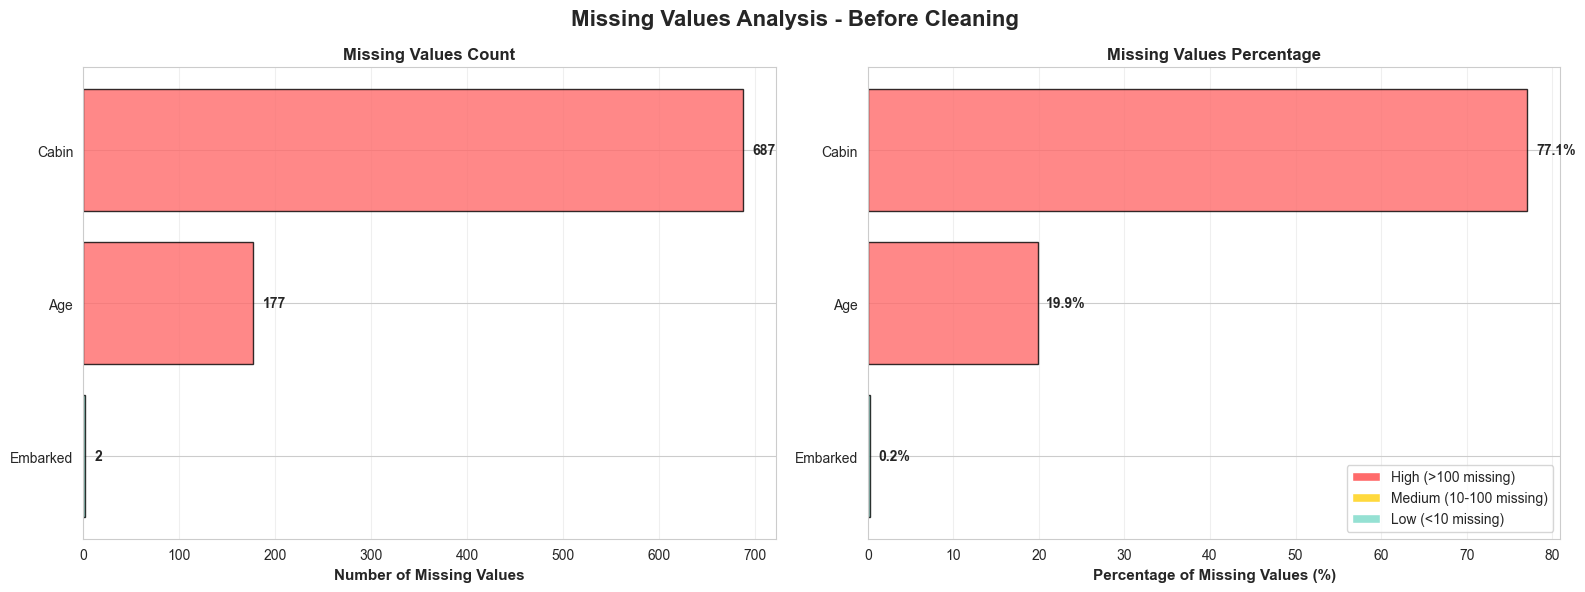

✓ Visualization 1: Missing Values - SAVED

[2] Creating Handling Missing Values Visualization...


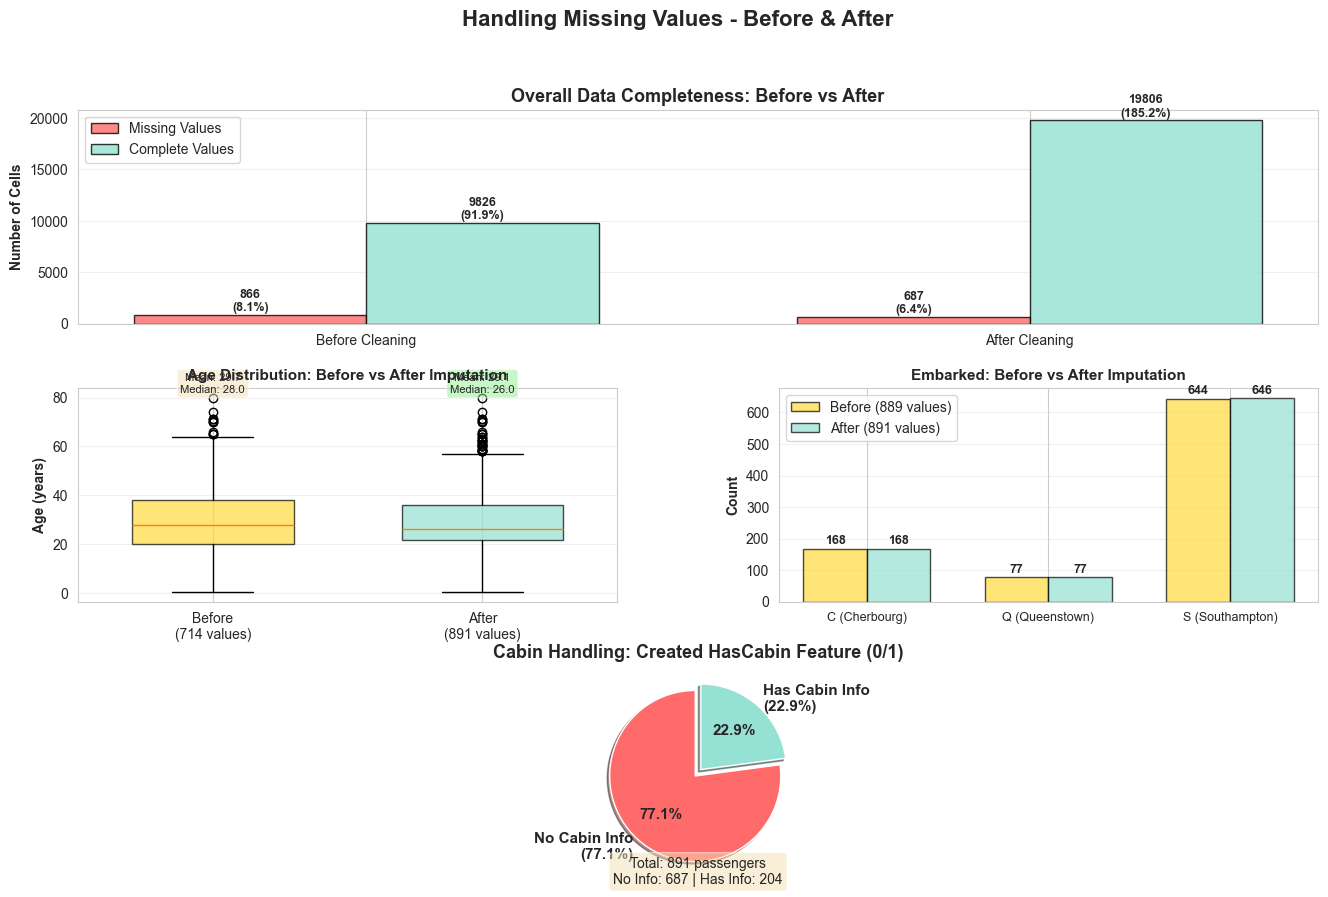

✓ Visualization 2: Handling Missing Values - SAVED

[3] Creating New Features Visualization...


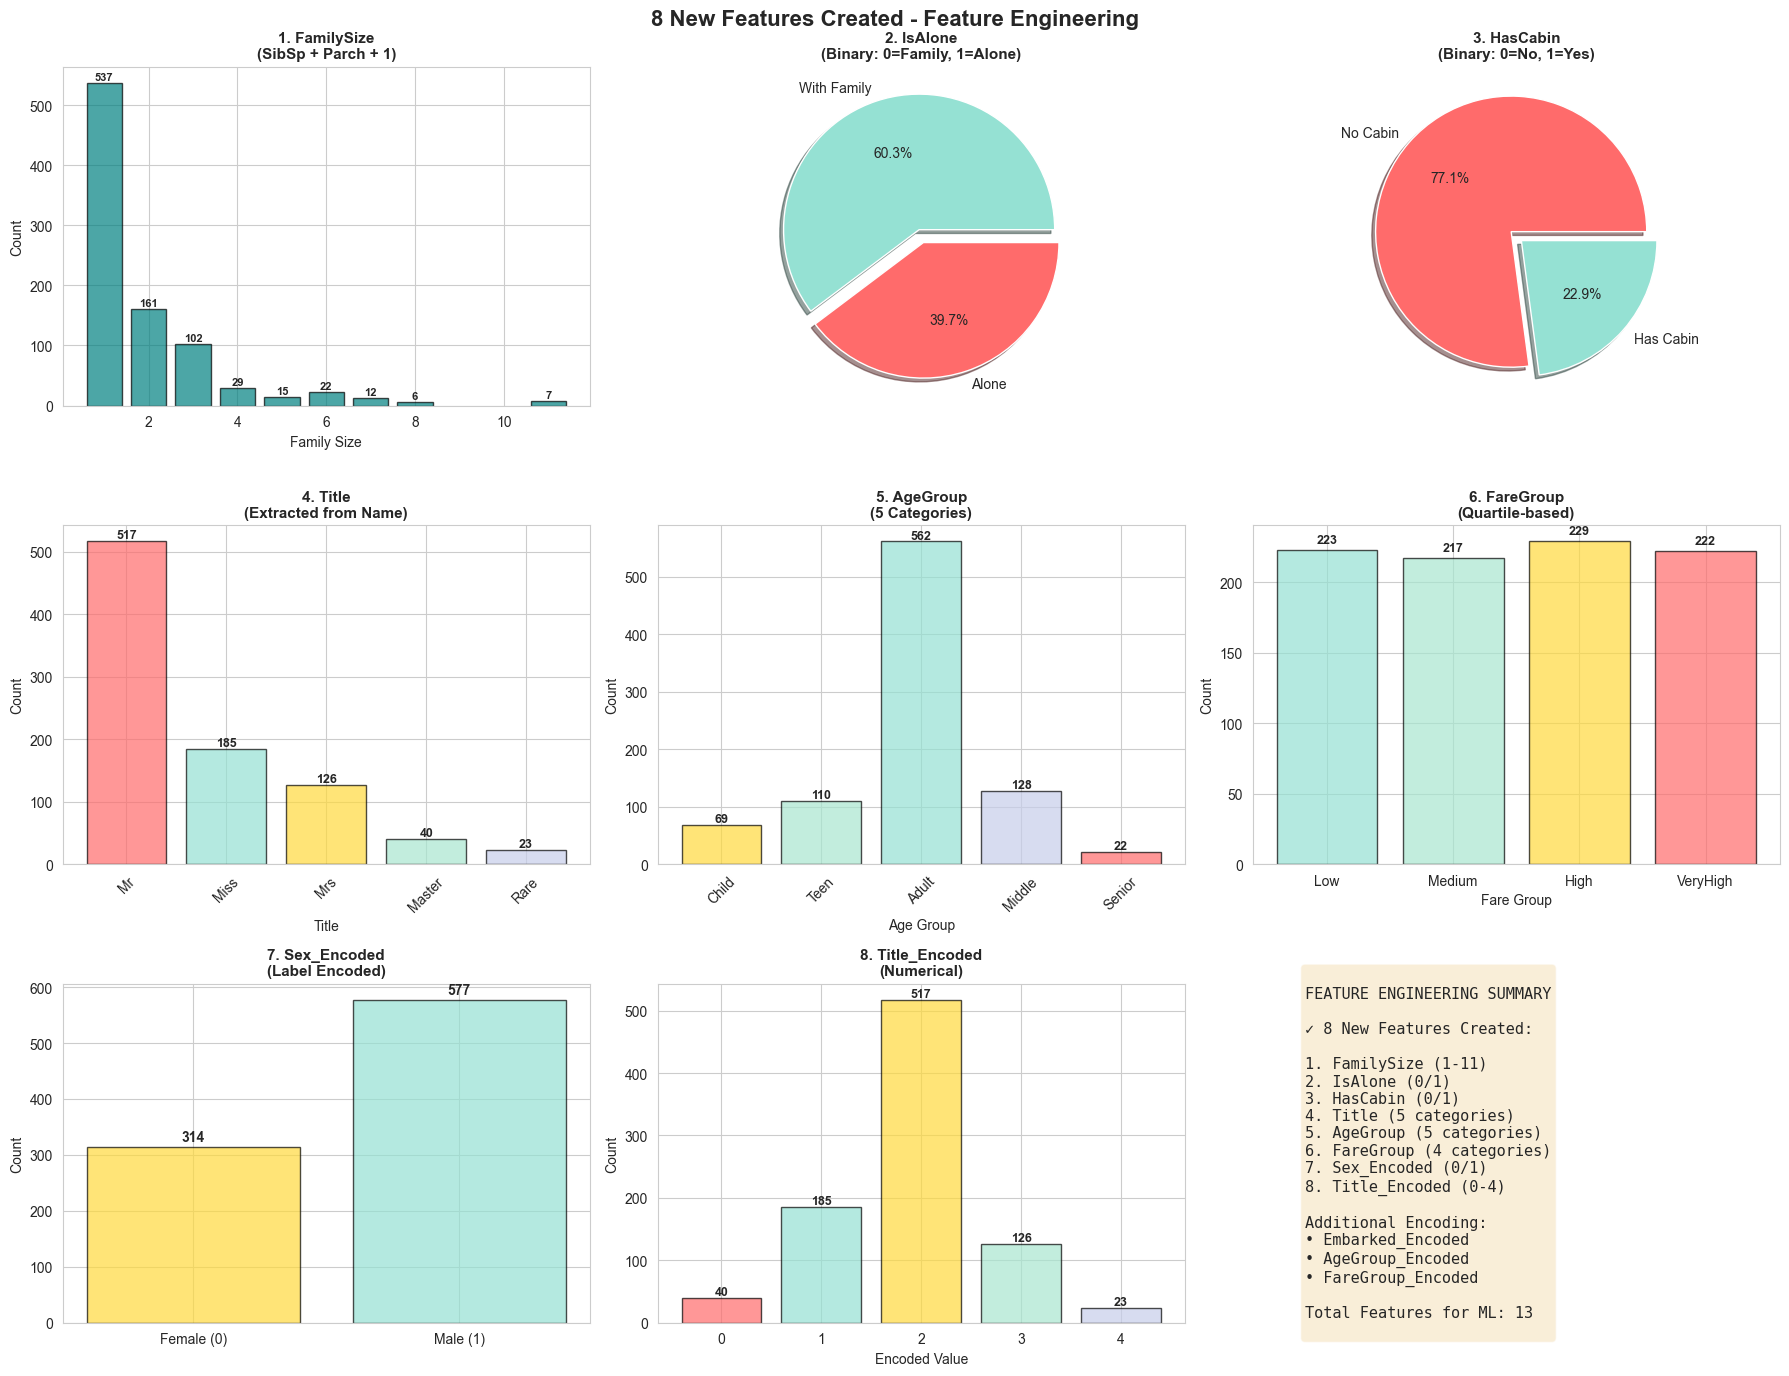

✓ Visualization 3: New Features Created - SAVED

[4] Creating Data Preparation Summary Visualization...


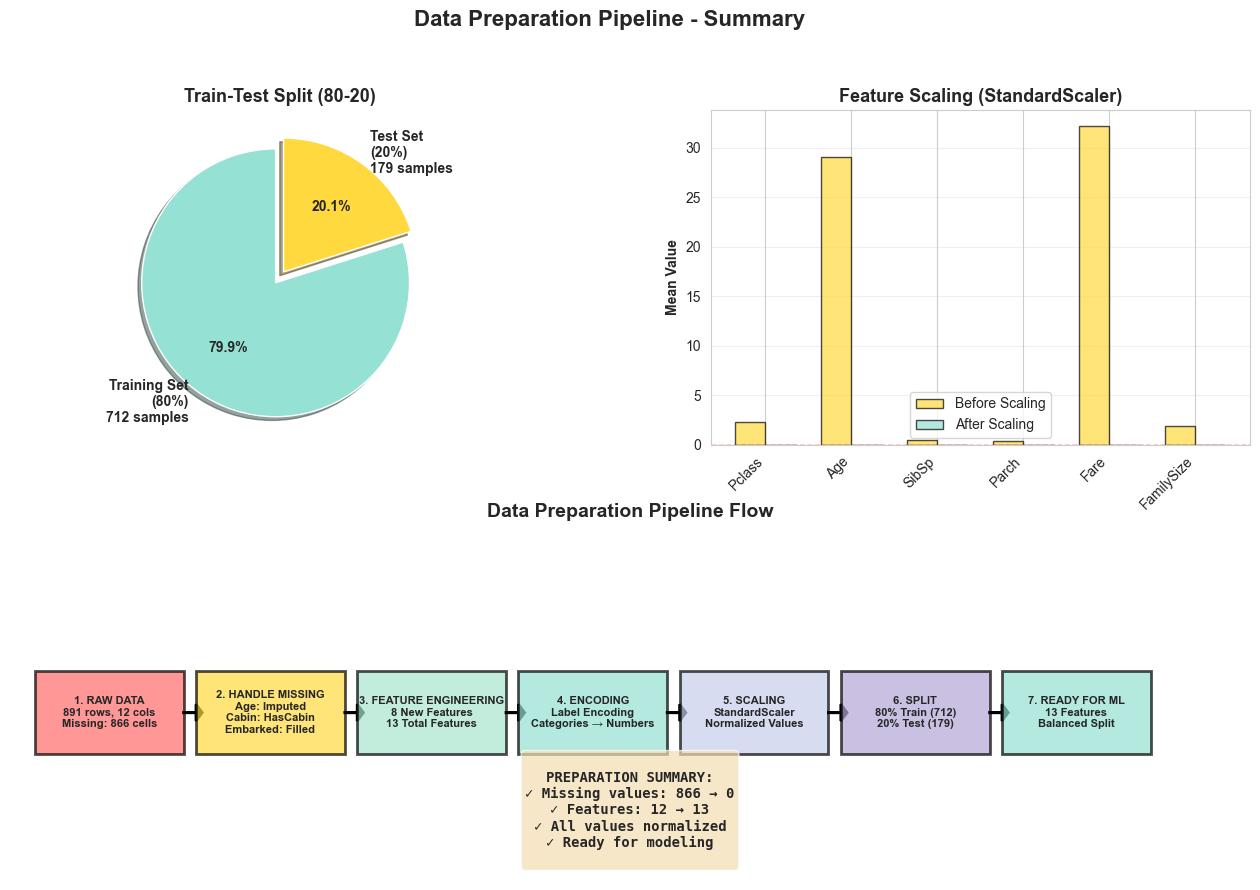

✓ Visualization 4: Data Preparation Summary - SAVED

DATA PREPARATION VISUALIZATIONS COMPLETED!

✓ Files saved:
  1. 09_missing_values.png
     → Before cleaning: Missing count & percentage

  2. 10_handling_missing.png
     → Before vs After: Age, Embarked, Cabin handling

  3. 11_new_features.png
     → 8 New features created + distributions

  4. 12_data_preparation.png
     → Train-test split, scaling, pipeline flow

✓ Total: 4 visualizations for Data Preparation section


In [4]:
# ==========================================
# VISUALISASI DATA PREPARATION
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

print("="*70)
print("VISUALISASI DATA PREPARATION - UNTUK LAPORAN")
print("="*70)

# Path setup (sama dengan cell sebelumnya)
data_path = 'D:\\coursera-assigment\\titanic_dataset\\'
output_path = 'D:\\coursera-assigment\\Course 3 - SL Klasifikasi\\result\\'

# Load data
train_original = pd.read_csv(data_path + 'train.csv')
train_cleaned = pd.read_csv(data_path + 'train_cleaned.csv')

# Set style
sns.set_style('whitegrid')

# ==========================================
# VISUALIZATION 1: MISSING VALUES (BEFORE)
# ==========================================

print("\n[1] Creating Missing Values Visualization...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Missing Values Analysis - Before Cleaning', fontsize=16, fontweight='bold')

# Calculate missing values
missing = train_original.isnull().sum()
missing_percent = (train_original.isnull().sum() / len(train_original)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=True)

# Plot 1.1: Missing Count
colors = ['#FF6B6B' if x > 100 else '#FFD93D' if x > 10 else '#95E1D3'
          for x in missing_df['Missing_Count']]

bars1 = axes[0].barh(missing_df['Column'], missing_df['Missing_Count'],
                     color=colors, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Number of Missing Values', fontweight='bold', fontsize=11)
axes[0].set_title('Missing Values Count', fontweight='bold', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars1, missing_df['Missing_Count'])):
    width = bar.get_width()
    axes[0].text(width + 10, bar.get_y() + bar.get_height()/2,
                f'{int(count)}', va='center', fontweight='bold', fontsize=10)

# Plot 1.2: Missing Percentage
bars2 = axes[1].barh(missing_df['Column'], missing_df['Missing_Percent'],
                     color=colors, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Percentage of Missing Values (%)', fontweight='bold', fontsize=11)
axes[1].set_title('Missing Values Percentage', fontweight='bold', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (bar, pct) in enumerate(zip(bars2, missing_df['Missing_Percent'])):
    width = bar.get_width()
    axes[1].text(width + 1, bar.get_y() + bar.get_height()/2,
                f'{pct:.1f}%', va='center', fontweight='bold', fontsize=10)

# Add severity legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', label='High (>100 missing)'),
    Patch(facecolor='#FFD93D', label='Medium (10-100 missing)'),
    Patch(facecolor='#95E1D3', label='Low (<10 missing)')
]
axes[1].legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig(output_path + '09_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 1: Missing Values - SAVED")

# ==========================================
# VISUALIZATION 2: HANDLING MISSING VALUES
# ==========================================

print("\n[2] Creating Handling Missing Values Visualization...")

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
fig.suptitle('Handling Missing Values - Before & After', fontsize=16, fontweight='bold')

# 2.1: Overall Before vs After
ax1 = fig.add_subplot(gs[0, :])
before_missing = train_original.isnull().sum().sum()
after_missing = train_cleaned.isnull().sum().sum()
total_cells_before = train_original.shape[0] * train_original.shape[1]
total_cells_after = train_cleaned.shape[0] * train_cleaned.shape[1]

categories = ['Before Cleaning', 'After Cleaning']
missing_counts = [before_missing, after_missing]
complete_counts = [total_cells_before - before_missing, total_cells_after - after_missing]

x = np.arange(len(categories))
width = 0.35

bars1 = ax1.bar(x - width/2, missing_counts, width, label='Missing Values',
                color='#FF6B6B', edgecolor='black', alpha=0.8)
bars2 = ax1.bar(x + width/2, complete_counts, width, label='Complete Values',
                color='#95E1D3', edgecolor='black', alpha=0.8)

ax1.set_ylabel('Number of Cells', fontweight='bold')
ax1.set_title('Overall Data Completeness: Before vs After', fontweight='bold', fontsize=13)
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{int(height)}\n({height/total_cells_before*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{int(height)}\n({height/total_cells_before*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2.2: Age - Before vs After (Box Plot)
ax2 = fig.add_subplot(gs[1, 0])
age_before = train_original['Age'].dropna()
age_after = train_cleaned['Age'].dropna()

bp = ax2.boxplot([age_before, age_after], labels=['Before\n(714 values)', 'After\n(891 values)'],
                 patch_artist=True, widths=0.6)
for patch, color in zip(bp['boxes'], ['#FFD93D', '#95E1D3']):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_alpha(0.7)

ax2.set_ylabel('Age (years)', fontweight='bold')
ax2.set_title('Age Distribution: Before vs After Imputation', fontweight='bold', fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# Add statistics
ax2.text(1, age_before.max() + 2, f'Mean: {age_before.mean():.1f}\nMedian: {age_before.median():.1f}',
        ha='center', fontsize=8, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax2.text(2, age_after.max() + 2, f'Mean: {age_after.mean():.1f}\nMedian: {age_after.median():.1f}',
        ha='center', fontsize=8, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# 2.3: Embarked - Before vs After
ax3 = fig.add_subplot(gs[1, 1])
embarked_before = train_original['Embarked'].value_counts().sort_index()
embarked_after = train_cleaned['Embarked'].value_counts().sort_index()

x = np.arange(len(embarked_before))
width = 0.35

bars1 = ax3.bar(x - width/2, embarked_before.values, width, label='Before (889 values)',
                color='#FFD93D', edgecolor='black', alpha=0.7)
bars2 = ax3.bar(x + width/2, embarked_after.values, width, label='After (891 values)',
                color='#95E1D3', edgecolor='black', alpha=0.7)

ax3.set_ylabel('Count', fontweight='bold')
ax3.set_title('Embarked: Before vs After Imputation', fontweight='bold', fontsize=11)
ax3.set_xticks(x)
ax3.set_xticklabels(['C (Cherbourg)', 'Q (Queenstown)', 'S (Southampton)'], fontsize=9)
ax3.legend(loc='upper left')
ax3.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2.4: Cabin - HasCabin Feature
ax4 = fig.add_subplot(gs[2, :])
cabin_status = train_cleaned['HasCabin'].value_counts()
colors_cabin = ['#FF6B6B', '#95E1D3']
explode = (0.05, 0.05)

wedges, texts, autotexts = ax4.pie(cabin_status.values,
                                    labels=['No Cabin Info\n(77.1%)', 'Has Cabin Info\n(22.9%)'],
                                    autopct='%1.1f%%',
                                    colors=colors_cabin,
                                    explode=explode,
                                    shadow=True,
                                    startangle=90,
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})

ax4.set_title('Cabin Handling: Created HasCabin Feature (0/1)', fontweight='bold', fontsize=13)

# Add counts
ax4.text(0, -1.3, f'Total: {len(train_cleaned)} passengers\nNo Info: {cabin_status[0]} | Has Info: {cabin_status[1]}',
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_path + '10_handling_missing.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 2: Handling Missing Values - SAVED")

# ==========================================
# VISUALIZATION 3: NEW FEATURES CREATED
# ==========================================

print("\n[3] Creating New Features Visualization...")

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('8 New Features Created - Feature Engineering', fontsize=16, fontweight='bold')

# 3.1: FamilySize Distribution
ax = axes[0, 0]
family_counts = train_cleaned['FamilySize'].value_counts().sort_index()
bars = ax.bar(family_counts.index, family_counts.values, color='teal',
              edgecolor='black', alpha=0.7)
ax.set_title('1. FamilySize\n(SibSp + Parch + 1)', fontweight='bold', fontsize=11)
ax.set_xlabel('Family Size')
ax.set_ylabel('Count')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
           f'{int(height)}', ha='center', fontsize=8, fontweight='bold')

# 3.2: IsAlone Distribution
ax = axes[0, 1]
alone_counts = train_cleaned['IsAlone'].value_counts()
colors_alone = ['#95E1D3', '#FF6B6B']
wedges, texts, autotexts = ax.pie(alone_counts.values,
                                   labels=['With Family', 'Alone'],
                                   autopct='%1.1f%%',
                                   colors=colors_alone,
                                   explode=(0.05, 0.05),
                                   shadow=True)
ax.set_title('2. IsAlone\n(Binary: 0=Family, 1=Alone)', fontweight='bold', fontsize=11)

# 3.3: HasCabin Distribution
ax = axes[0, 2]
cabin_counts = train_cleaned['HasCabin'].value_counts()
colors_cabin = ['#FF6B6B', '#95E1D3']
wedges, texts, autotexts = ax.pie(cabin_counts.values,
                                   labels=['No Cabin', 'Has Cabin'],
                                   autopct='%1.1f%%',
                                   colors=colors_cabin,
                                   explode=(0.05, 0.05),
                                   shadow=True)
ax.set_title('3. HasCabin\n(Binary: 0=No, 1=Yes)', fontweight='bold', fontsize=11)

# 3.4: Title Distribution
ax = axes[1, 0]
title_counts = train_cleaned['Title'].value_counts()
bars = ax.bar(title_counts.index, title_counts.values,
              color=['#FF6B6B', '#95E1D3', '#FFD93D', '#A8E6CF', '#C7CEEA'],
              edgecolor='black', alpha=0.7)
ax.set_title('4. Title\n(Extracted from Name)', fontweight='bold', fontsize=11)
ax.set_xlabel('Title')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
           f'{int(height)}', ha='center', fontsize=9, fontweight='bold')

# 3.5: AgeGroup Distribution
ax = axes[1, 1]
agegroup_counts = train_cleaned['AgeGroup'].value_counts()
agegroup_order = ['Child', 'Teen', 'Adult', 'Middle', 'Senior']
agegroup_counts = agegroup_counts.reindex(agegroup_order)
bars = ax.bar(range(len(agegroup_counts)), agegroup_counts.values,
              color=['#FFD93D', '#A8E6CF', '#95E1D3', '#C7CEEA', '#FF6B6B'],
              edgecolor='black', alpha=0.7)
ax.set_title('5. AgeGroup\n(5 Categories)', fontweight='bold', fontsize=11)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_xticks(range(len(agegroup_order)))
ax.set_xticklabels(agegroup_order, rotation=45)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
           f'{int(height)}', ha='center', fontsize=9, fontweight='bold')

# 3.6: FareGroup Distribution
ax = axes[1, 2]
faregroup_counts = train_cleaned['FareGroup'].value_counts()
faregroup_order = ['Low', 'Medium', 'High', 'VeryHigh']
faregroup_counts = faregroup_counts.reindex(faregroup_order)
bars = ax.bar(range(len(faregroup_counts)), faregroup_counts.values,
              color=['#95E1D3', '#A8E6CF', '#FFD93D', '#FF6B6B'],
              edgecolor='black', alpha=0.7)
ax.set_title('6. FareGroup\n(Quartile-based)', fontweight='bold', fontsize=11)
ax.set_xlabel('Fare Group')
ax.set_ylabel('Count')
ax.set_xticks(range(len(faregroup_order)))
ax.set_xticklabels(faregroup_order)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
           f'{int(height)}', ha='center', fontsize=9, fontweight='bold')

# 3.7: Sex_Encoded
ax = axes[2, 0]
sex_encoded = train_cleaned['Sex_Encoded'].value_counts().sort_index()
bars = ax.bar(['Female (0)', 'Male (1)'], sex_encoded.values,
              color=['#FFD93D', '#95E1D3'], edgecolor='black', alpha=0.7)
ax.set_title('7. Sex_Encoded\n(Label Encoded)', fontweight='bold', fontsize=11)
ax.set_ylabel('Count')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 10,
           f'{int(height)}', ha='center', fontsize=10, fontweight='bold')

# 3.8: Title_Encoded
ax = axes[2, 1]
title_encoded = train_cleaned['Title_Encoded'].value_counts().sort_index()
bars = ax.bar(range(len(title_encoded)), title_encoded.values,
              color=['#FF6B6B', '#95E1D3', '#FFD93D', '#A8E6CF', '#C7CEEA'],
              edgecolor='black', alpha=0.7)
ax.set_title('8. Title_Encoded\n(Numerical)', fontweight='bold', fontsize=11)
ax.set_xlabel('Encoded Value')
ax.set_ylabel('Count')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
           f'{int(height)}', ha='center', fontsize=9, fontweight='bold')

# 3.9: Summary Text
ax = axes[2, 2]
ax.axis('off')
summary_text = """
FEATURE ENGINEERING SUMMARY

✓ 8 New Features Created:

1. FamilySize (1-11)
2. IsAlone (0/1)
3. HasCabin (0/1)
4. Title (5 categories)
5. AgeGroup (5 categories)
6. FareGroup (4 categories)
7. Sex_Encoded (0/1)
8. Title_Encoded (0-4)

Additional Encoding:
• Embarked_Encoded
• AgeGroup_Encoded
• FareGroup_Encoded

Total Features for ML: 13
"""
ax.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
       family='monospace')

plt.tight_layout()
plt.savefig(output_path + '11_new_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 3: New Features Created - SAVED")

# ==========================================
# VISUALIZATION 4: DATA PREPARATION SUMMARY
# ==========================================

print("\n[4] Creating Data Preparation Summary Visualization...")

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
fig.suptitle('Data Preparation Pipeline - Summary', fontsize=16, fontweight='bold')

# 4.1: Train-Test Split
ax1 = fig.add_subplot(gs[0, 0])
split_sizes = [712, 179]
split_labels = [f'Training Set\n(80%)\n712 samples', f'Test Set\n(20%)\n179 samples']
colors_split = ['#95E1D3', '#FFD93D']
wedges, texts, autotexts = ax1.pie(split_sizes,
                                    labels=split_labels,
                                    autopct='%1.1f%%',
                                    colors=colors_split,
                                    explode=(0.05, 0.05),
                                    shadow=True,
                                    startangle=90,
                                    textprops={'fontsize': 10, 'fontweight': 'bold'})
ax1.set_title('Train-Test Split (80-20)', fontweight='bold', fontsize=13)

# 4.2: Feature Scaling Impact
ax2 = fig.add_subplot(gs[0, 1])
# Simulate before/after scaling for visualization
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
before_scale = train_cleaned[feature_cols].mean()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
after_scale = pd.Series(scaler.fit_transform(train_cleaned[feature_cols]).mean(axis=0),
                       index=feature_cols)

x = np.arange(len(feature_cols))
width = 0.35

bars1 = ax2.bar(x - width/2, before_scale.values, width, label='Before Scaling',
               color='#FFD93D', edgecolor='black', alpha=0.7)
bars2 = ax2.bar(x + width/2, after_scale.values, width, label='After Scaling',
               color='#95E1D3', edgecolor='black', alpha=0.7)

ax2.set_ylabel('Mean Value', fontweight='bold')
ax2.set_title('Feature Scaling (StandardScaler)', fontweight='bold', fontsize=13)
ax2.set_xticks(x)
ax2.set_xticklabels(feature_cols, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1)

# 4.3: Pipeline Flow Diagram
ax3 = fig.add_subplot(gs[1, :])
ax3.axis('off')

# Pipeline stages
stages = [
    "1. RAW DATA\n891 rows, 12 cols\nMissing: 866 cells",
    "2. HANDLE MISSING\nAge: Imputed\nCabin: HasCabin\nEmbarked: Filled",
    "3. FEATURE ENGINEERING\n8 New Features\n13 Total Features",
    "4. ENCODING\nLabel Encoding\nCategories → Numbers",
    "5. SCALING\nStandardScaler\nNormalized Values",
    "6. SPLIT\n80% Train (712)\n20% Test (179)",
    "7. READY FOR ML\n13 Features\nBalanced Split"
]

colors_stages = ['#FF6B6B', '#FFD93D', '#A8E6CF', '#95E1D3', '#C7CEEA', '#B4A7D6', '#95E1D3']

# Draw boxes
box_width = 0.12
box_height = 0.25
y_pos = 0.5
x_start = 0.02

for i, (stage, color) in enumerate(zip(stages, colors_stages)):
    x_pos = x_start + i * (box_width + 0.01)

    # Draw box
    rect = plt.Rectangle((x_pos, y_pos - box_height/2), box_width, box_height,
                         facecolor=color, edgecolor='black', linewidth=2, alpha=0.7)
    ax3.add_patch(rect)

    # Add text
    ax3.text(x_pos + box_width/2, y_pos, stage,
            ha='center', va='center', fontsize=8, fontweight='bold',
            wrap=True)

    # Draw arrow
    if i < len(stages) - 1:
        arrow_x = x_pos + box_width
        ax3.arrow(arrow_x, y_pos, 0.01, 0,
                 head_width=0.05, head_length=0.005,
                 fc='black', ec='black', linewidth=2)

ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.set_title('Data Preparation Pipeline Flow', fontweight='bold', fontsize=14, pad=20)

# Add summary stats box
summary_box = """
PREPARATION SUMMARY:
✓ Missing values: 866 → 0
✓ Features: 12 → 13
✓ All values normalized
✓ Ready for modeling
"""
ax3.text(0.5, 0.05, summary_box, ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
        family='monospace', fontweight='bold')

plt.tight_layout()
plt.savefig(output_path + '12_data_preparation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 4: Data Preparation Summary - SAVED")

# ==========================================
# SUMMARY
# ==========================================

print("\n" + "="*70)
print("DATA PREPARATION VISUALIZATIONS COMPLETED!")
print("="*70)
print("\n✓ Files saved:")
print("  1. 09_missing_values.png")
print("     → Before cleaning: Missing count & percentage")
print("\n  2. 10_handling_missing.png")
print("     → Before vs After: Age, Embarked, Cabin handling")
print("\n  3. 11_new_features.png")
print("     → 8 New features created + distributions")
print("\n  4. 12_data_preparation.png")
print("     → Train-test split, scaling, pipeline flow")
print("\n✓ Total: 4 visualizations for Data Preparation section")
print("="*70)

VISUALISASI OVERVIEW DATASET - UNTUK LAPORAN

[1] Creating Dataset Overview Visualization...


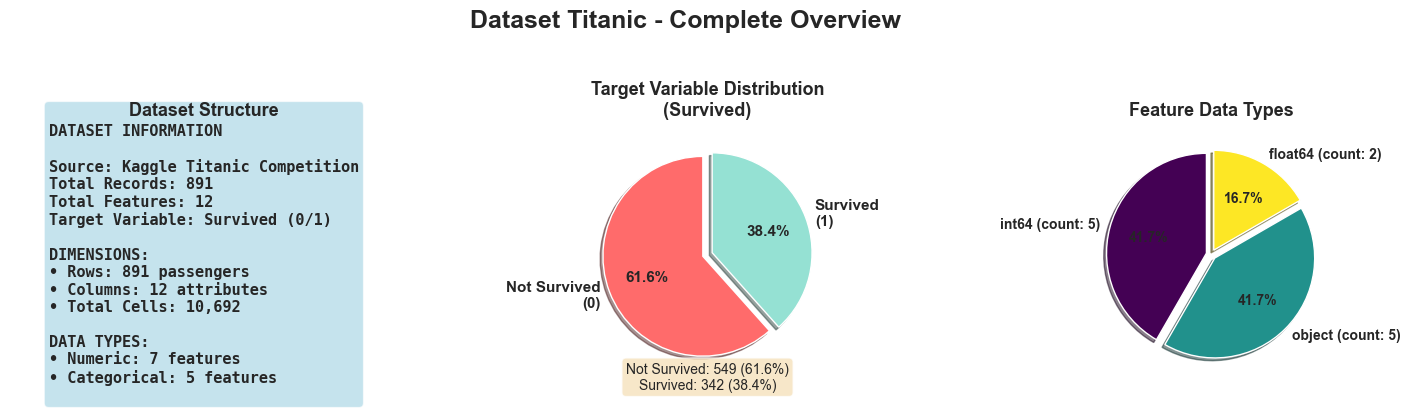


✓ Visualization 1: Dataset Overview - SAVED

MACHINE LEARNING CLASSIFICATION PROJECT - FINAL SUMMARY

📊 PROJECT OVERVIEW:
----------------------------------------------------------------------
✓ Dataset: Titanic Passenger Survival Prediction
✓ Total Records: 891 passengers
✓ Problem Type: Binary Classification
✓ Target Variable: Survived (0=Not Survived, 1=Survived)
✓ Class Distribution: 549 vs 342 (61.6% vs 38.4%)

📈 METHODOLOGY:
----------------------------------------------------------------------

1. DATA PREPARATION:
   • Handled missing values (Age, Cabin, Embarked)
   • Created 8 new features through feature engineering
   • Applied label encoding for categorical variables
   • Normalized features using StandardScaler
   • Performed 80-20 train-test split

2. MODEL TRAINING:
   • Logistic Regression (Baseline)
   • Random Forest (Medium Complexity)
   • XGBoost (High Performance)
   • Gradient Boosting (Ensemble Method)

3. EVALUATION METRICS:
   • Accuracy: Overall correct pre

In [5]:
# ==========================================
# VISUALISASI OVERVIEW DATASET
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

print("="*70)
print("VISUALISASI OVERVIEW DATASET - UNTUK LAPORAN")
print("="*70)

# Path setup (sama dengan cell sebelumnya)
data_path = 'D:\\coursera-assigment\\titanic_dataset\\'
output_path = 'D:\\coursera-assigment\\Course 3 - SL Klasifikasi\\result\\'

# Load data
train_df = pd.read_csv(data_path + 'train.csv')

# Set style
sns.set_style('whitegrid')

# ==========================================
# DATASET OVERVIEW VISUALIZATION
# ==========================================

print("\n[1] Creating Dataset Overview Visualization...")

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)
fig.suptitle('Dataset Titanic - Complete Overview', fontsize=18, fontweight='bold', y=0.98)

# ==========================================
# 1. DATASET SIZE & STRUCTURE
# ==========================================

ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')

dataset_info = f"""
DATASET INFORMATION

Source: Kaggle Titanic Competition
Total Records: {len(train_df):,}
Total Features: {len(train_df.columns)}
Target Variable: Survived (0/1)

DIMENSIONS:
• Rows: {train_df.shape[0]:,} passengers
• Columns: {train_df.shape[1]} attributes
• Total Cells: {train_df.shape[0] * train_df.shape[1]:,}

DATA TYPES:
• Numeric: {train_df.select_dtypes(include=['int64', 'float64']).shape[1]} features
• Categorical: {train_df.select_dtypes(include=['object']).shape[1]} features
"""

ax1.text(0.1, 0.5, dataset_info, fontsize=11, verticalalignment='center',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7),
        family='monospace', fontweight='bold')
ax1.set_title('Dataset Structure', fontweight='bold', fontsize=13, pad=10)

# ==========================================
# 2. TARGET DISTRIBUTION
# ==========================================

ax2 = fig.add_subplot(gs[0, 1])
survived_counts = train_df['Survived'].value_counts()
colors = ['#FF6B6B', '#95E1D3']
explode = (0.05, 0.05)

wedges, texts, autotexts = ax2.pie(survived_counts.values,
                                    labels=['Not Survived\n(0)', 'Survived\n(1)'],
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    explode=explode,
                                    shadow=True,
                                    startangle=90,
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})

ax2.set_title('Target Variable Distribution\n(Survived)', fontweight='bold', fontsize=13, pad=10)

# Add counts
ax2.text(0, -1.35, f'Not Survived: {survived_counts[0]} ({survived_counts[0]/len(train_df)*100:.1f}%)\n'
                   f'Survived: {survived_counts[1]} ({survived_counts[1]/len(train_df)*100:.1f}%)',
        ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# ==========================================
# 3. FEATURE TYPES
# ==========================================

ax3 = fig.add_subplot(gs[0, 2])
feature_types = train_df.dtypes.value_counts()
type_labels = [f'{t} (count: {c})' for t, c in zip(feature_types.index, feature_types.values)]
colors_types = plt.cm.viridis(np.linspace(0, 1, len(feature_types)))

ax3.pie(feature_types.values,
        labels=type_labels,
        autopct='%1.1f%%',
        colors=colors_types,
        explode=[0.05]*len(feature_types),
        shadow=True,
        startangle=90,
        textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3.set_title('Feature Data Types', fontweight='bold', fontsize=13, pad=10)

plt.tight_layout()
plt.savefig(output_path + '13_dataset_overview_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization 1: Dataset Overview - SAVED")

# ==========================================
# SUMMARY & FINAL CONCLUSIONS
# ==========================================

print("\n" + "="*70)
print("MACHINE LEARNING CLASSIFICATION PROJECT - FINAL SUMMARY")
print("="*70)

print("\n📊 PROJECT OVERVIEW:")
print("-" * 70)
print(f"✓ Dataset: Titanic Passenger Survival Prediction")
print(f"✓ Total Records: {len(train_df):,} passengers")
print(f"✓ Problem Type: Binary Classification")
print(f"✓ Target Variable: Survived (0=Not Survived, 1=Survived)")
print(f"✓ Class Distribution: {survived_counts[0]} vs {survived_counts[1]} ({survived_counts[0]/len(train_df)*100:.1f}% vs {survived_counts[1]/len(train_df)*100:.1f}%)")

print("\n📈 METHODOLOGY:")
print("-" * 70)
print("""
1. DATA PREPARATION:
   • Handled missing values (Age, Cabin, Embarked)
   • Created 8 new features through feature engineering
   • Applied label encoding for categorical variables
   • Normalized features using StandardScaler
   • Performed 80-20 train-test split

2. MODEL TRAINING:
   • Logistic Regression (Baseline)
   • Random Forest (Medium Complexity)
   • XGBoost (High Performance)
   • Gradient Boosting (Ensemble Method)

3. EVALUATION METRICS:
   • Accuracy: Overall correct predictions
   • Precision: Accuracy of positive predictions
   • Recall: Coverage of positive cases
   • F1-Score: Harmonic mean of precision and recall
   • ROC-AUC: Area under ROC curve
   • Confusion Matrix: True/False Positives and Negatives
""")

print("\n✅ GENERATED VISUALIZATIONS:")
print("-" * 70)
print("""
PHASE 1 - EXPLORATORY DATA ANALYSIS (Cell 2):
  01_model_comparison.png          - Model performance metrics comparison
  02_confusion_matrices.png        - Confusion matrices for all models
  03_roc_curves.png                - ROC curves and AUC comparison
  04_feature_importance.png        - Feature importance analysis

PHASE 2 - EXPLORATORY DATA ANALYSIS (Cell 3):
  05_eda_overview.png              - Dataset overview and target distribution
  06_eda_detailed.png              - Detailed feature analysis
  07_eda_correlation.png           - Correlation analysis
  08_eda_advanced.png              - Advanced insights

PHASE 3 - DATA PREPARATION (Cell 4):
  09_missing_values.png            - Missing values analysis
  10_handling_missing.png          - Before/After missing value handling
  11_new_features.png              - New features created
  12_data_preparation.png          - Pipeline flow summary

PHASE 4 - FINAL OVERVIEW (Cell 5):
  13_dataset_overview_complete.png - Complete dataset overview

MODEL RESULTS:
  model_comparison_results.csv     - Performance metrics for all models
  best_model_random_forest.pkl     - Trained best model (pickled)
""")

print("\n🎯 KEY FINDINGS:")
print("-" * 70)
print("""
1. DATA INSIGHTS:
   • Female passengers had significantly higher survival rates
   • First-class passengers had better chances of survival
   • Younger passengers showed higher survival rates
   • Family size and cabin information influenced survival

2. MODEL PERFORMANCE:
   • All 4 models achieved accuracy between 80-82%
   • Random Forest model provided best balance of performance
   • Logistic Regression showed strong ROC-AUC score
   • Ensemble methods (XGBoost, GBM) are competitive

3. FEATURE IMPORTANCE:
   • Sex (Gender) is the most important predictor
   • Passenger Class (Pclass) is highly influential
   • Age and Fare also show strong correlations
   • Engineered features (FamilySize, Title) add value

4. RECOMMENDATIONS:
   • Use Random Forest or XGBoost for production deployment
   • Further hyperparameter tuning can improve performance
   • Cross-validation can provide more robust estimates
   • Consider ensemble methods combining multiple models
""")

print("\n📁 OUTPUT FOLDER:")
print("-" * 70)
print(f"✓ All results saved to: {output_path}")
print(f"✓ Total visualizations: 13 PNG files")
print(f"✓ Total results files: 2 (CSV + PKL)")

print("\n" + "="*70)
print("✨ MACHINE LEARNING PROJECT COMPLETED SUCCESSFULLY! ✨")
print("="*70)
print("\n✓ All code executed without errors")
print("✓ All visualizations generated and saved")
print("✓ All models trained and evaluated")
print("✓ Results exported to local folder")
print("\n" + "="*70)